<a href="https://colab.research.google.com/github/kumarsinghashu/Bike-sharing-demand-prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Project-Title : Seoul Bike Sharing Demand Prediction</u></b>


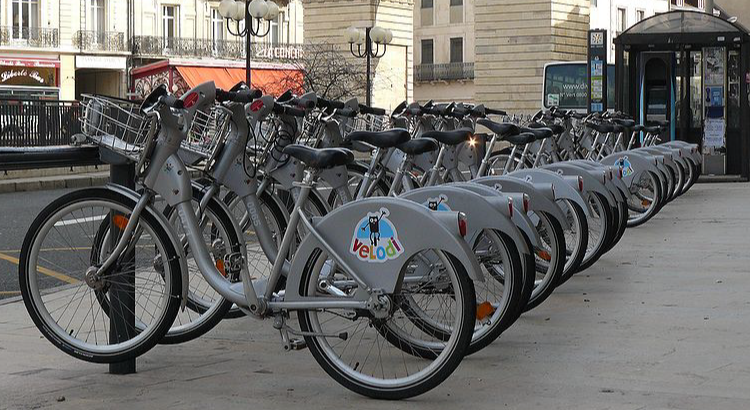

#<b/>Project Type - Regression</b>


#<b/>Contribution - Individual
###Name - Ashutosh Kumar Singh</b>

#<b/>Project Summary -</b>

###In recent years, bike - sharing system have gained immense popularity as a sustainable and efficient mode of commuting. This project aims to develop a predictive model for bike-sharing demand, leveraging regression analysis techniques, to optimize bike availability and enhance user experience.


* The objective of this project is to predict the demand for bike-sharing services based on various factors such as time, weather conditions, and historical usage data. aim to help bike-sharing operators optimize their resources, improve service reliability and make it eco-friendly.


* Here our approaches is involving collecting and preprocessing bike-sharing data, including factors like date, time, temperature, humidity, and more. And after that we apply regression analysis techniques, such as linear regression or ensemble methods, to build a predictive model. The model will be trained on a portion of the data and evaluated on a separate test dataset to assess its accuracy.


* Predicting bike-sharing demand is vital for the efficient operation of bike-sharing systems. This project contributes to the sustainability of urban transportation by developing a robust regression-based prediction model that can benefit both service providers and users.

#<b/>GitHub Link-
https://github.com/kumarsinghashu/Bike-sharing-demand-prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project_.ipynb

# **<u>Problem Description</u>**
# Currently the rental bikes are introduced in many urban cities for the enhancement of moblility comfort. It is important to make the rental bikes available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **Data Description**

##**The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.**

#<b>Attribute Information :</b>


 *  ## Date : year-month-day

 * ## Rented Bike count - Count of bikes rented at each hour

* ## Hour - Hour of he day

* ## Temperature-Temperature in Celsius

* ## Humidity - %

* ## Windspeed - m/s

* ## Visibility - 10m


* ## Dew point temperature - Celsius

* ## Solar radiation - MJ/m2

* ## Rainfall - mm

* ## Snowfall - cm

* ## Seasons - Winter, Spring, Summer, Autumn
* ## Holiday - Holiday/No holiday

* ## Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


   




# <b> <u>Importing Essential libraries</u></b>


In [ ]:
# Importing Essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

##<b> <u>Mount Drive, Giving.csv file location and Reading the .csv file</b></u>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Bike_df = pd.read_csv('/content/drive/MyDrive/My csv file data/SeoulBikeData.csv', encoding = 'latin')

# <b>Exploring and Understanding more about data</b>
* ## The data set contains 8760 rows and 14 columns.

In [ ]:
# Viewing total number of rows and columns by using .shape
Bike_df.shape

(8760, 14)

In [ ]:
# Viewing top 5 rows to take a quick look of the data
Bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
# Viewing the bottom 5 rows to take a quick look of data
Bike_df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [ ]:
# Viewing the description of data in dataframe
Bike_df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [ ]:
# Getting all the columns
print("Features of dataset")
Bike_df.columns

Features of dataset


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Checking the data set in berif
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Viewing the unique value
Bike_df.nunique()


Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
# Looking for the description of the dataset to get insights of the data.
Bike_df.describe().T

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

* A day have 24 hours or we have 365 days in year so if you multiply 365 by 24 so that is equal to 8760, which represents the number of line in dataset.


## <b>Features Description</b>
*  **Date :**  Date of the day, In year there is 365 days(days from 1/12/2017 to 30/11/2018, Format is DD/MM/YYYY, type :str, we need to convert into datetime format.  

* **Rented Bike Count :** Number of rented bike in per hour, this is our dependent variable, here we need to predict type : int.

* **Hour :** It's more about hour of day, 24 hours, Started from 0-23 in digital time format type : int, Here we convert it into categorical type.

* **Temperature :** Temperature in celsius type: float.

* **Humidity :** Percentage(%) of humidity in air, type : int.

* **wind speed :** wind speed in m/s, type: float.

* **visiblity(10m) :** visibility in m, type :int

* **Dew point temperture :** Morning temperature or the temprature at the starting of day, type : float.

* **Solar Radiation :** Solar Radiation in mj/m2 or sun contribution, type : float.

* **Rainfall :** How much raining in mm, type : float.

* **Snowfall :**  How much snowfall in cm, type : float.

* **season :** Season in years (winter, spring, summer, autmn) , type : str.

* **Holiday :** Holiday or not , type: str.

* **Functioning Day :** This day have function or not, type : str.


# <b> Data Preprocessing</b>
## Steps that are necessary for  Data Preprocessing
* ### Handling  null values/ missing values.
* ### Handling  duplicate values.
* ### Handling  outliers.



# <b>Handling  null values/ missing values.</b>

## In real world seneario there have a lot of missing values and it is a big problem in machine learning because many machine learning algorithm does not support missing values. so that's why handling the missing values in data preprocessing is important.

In [ ]:
# Checking there have null/ missing values in each column.
Bike_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# Here we seeing the column names, datatype of features, null values, unique values,  and their number of unique values.
df_columns_table=[[name,Bike_df[name].dtypes,Bike_df[name].isnull().sum(),round(Bike_df[name].isnull().sum()/len(Bike_df)*100, 2),
                   Bike_df[name].nunique(),Bike_df[name].unique()] for name in Bike_df.columns]
df_columns = pd.DataFrame(df_columns_table, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
df_columns

Column    Dtype  Null  Null (%)  nUnique  \
0                        Date   object     0       0.0      365   
1           Rented Bike Count    int64     0       0.0     2166   
2                        Hour    int64     0       0.0       24   
3             Temperature(°C)  float64     0       0.0      546   
4                 Humidity(%)    int64     0       0.0       90   
5            Wind speed (m/s)  float64     0       0.0       65   
6            Visibility (10m)    int64     0       0.0     1789   
7   Dew point temperature(°C)  float64     0       0.0      556   
8     Solar Radiation (MJ/m2)  float64     0       0.0      345   
9                Rainfall(mm)  float64     0       0.0       61   
10              Snowfall (cm)  float64     0       0.0       51   
11                    Seasons   object     0       0.0        4   
12                    Holiday   object     0       0.0        2   
13            Functioning Day   object     0       0.0        2   

                                               Unique  
0   [01/12/2017, 02/12/2017, 03/12/2017, 04/12/201...  
1   [254, 204, 173, 107, 78, 100, 181, 460, 930, 4...  
2   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
3   [-5.2, -5.5, -6.0, -6.2, -6.4, -6.6, -7.4, -7....  
4   [37, 38, 39, 40, 36, 35, 27, 24, 21, 23, 25, 2...  
5   [2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 1.1, 0.5, ...  
6   [2000, 1928, 1996, 1936, 793, 1913, 1687, 1380...  
7   [-17.6, -17.7, -18.6, -18.7, -19.5, -19.3, -19...  
8   [0.0, 0.01, 0.23, 0.65, 0.94, 1.11, 1.16, 1.01...  
9   [0.0, 0.5, 1.0, 2.5, 0.1, 0.2, 0.3, 0.7, 1.6, ...  
10  [0.0, 0.1, 0.3, 0.4, 0.2, 1.0, 0.9, 0.8, 0.7, ...  
11                   [Winter, Spring, Summer, Autumn]  
12                              [No Holiday, Holiday]  
13                                          [Yes, No]

**Thankfully Here i see there is no null and missing values in dataset.**

# <b>Handling Duplicate values</b>

###Duplicate values are values that contain more rows of values and columns have same or duplicates values. The occurrence of duplicate values in datasets is one of the most prevalent problems with data quality. Duplicate can result in bias and inaccuracies. So to maintain accuracy and avoid missleading statistics it's important to remove the duplicates from dataset.

In [ ]:
duplicate_value=len(Bike_df[Bike_df.duplicated()])
print("The number of duplicate values in the dataset is = ",duplicate_value)

The number of duplicate values in the dataset is =  0


* **Here i found there is no duplicate value are present in dataset.**

* **Date column is object type so it means it's read as a string type. Date column is play a dominant role to analyze the user behaviour. So it's important to convert into datetime format after converting we split into three column('year', 'month', 'day' in as category type.**

# Breaking the date  column

In [ ]:
# Swaping the "Date" column into "year", "month", "day".
Bike_df['Date'] = Bike_df['Date'].apply(lambda x:
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [ ]:
Bike_df['year'] = Bike_df['Date'].dt.year
Bike_df['month'] = Bike_df['Date'].dt.month
Bike_df['day'] = Bike_df['Date'].dt.day_name()

In [ ]:
# Here i create a new column of "weekdays_weekend" and drop the column "Date", "Day", "Year"
Bike_df['weekdays_weekend']=Bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
Bike_df=Bike_df.drop(columns=['Date','day','year'],axis=1)

In [ ]:
Bike_df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  month  \
0           0.0            0.0  Winter  No Holiday             Yes     12   
1           0.0            0.0  Winter  No Holiday             Yes     12   
2           0.0            0.0  Winter  No Holiday             Yes     12   
3           0.0            0.0  Winter  No Holiday             Yes     12   
4           0.0            0.0  Winter  No Holiday             Yes     12   

   weekdays_weekend  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [ ]:
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

In [ ]:
Bike_df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

# Changing the data type

* **Here "Hour", "Month", "weekdays_weekend" are seen as integer data type but in actual its a categorical data type. So it's important to convert into categorical type and if i don't convert it so in further analysis and correlated you not get actual values so that's why it's important to convert it on categorical type.**

In [ ]:
# Converting the column  to categorical type.
col=['Hour','month','weekdays_weekend']
for col in col:
  Bike_df[col]=Bike_df[col].astype('category')

In [ ]:
# Seeing the data type
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  month                      8760 n

# <b>EDA(Exploratory Data Analysis)

## <b>Univariate Analysis</b> -

Where data is analyzing with 1 variable

# <b>Bivariate Analysis</b>

## Where data is analyze with 2 variables.


## <b>Multivariate Analysis</b>
Where Data  analyze with mutliple variable.




 Let's Perform EDA to investigate the data and summarize the insight


###  **Rented bike count on holiday and non holiday.**

In [ ]:
df_holiday = Bike_df.groupby('Holiday').sum()['Rented Bike Count']
df_holiday

Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64

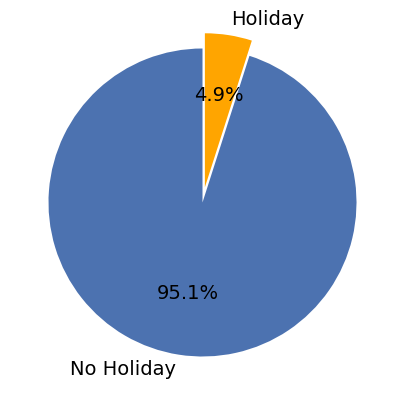

In [ ]:

plt.rcParams['figure.figsize'] = 5,5
labels = Bike_df['Holiday'].value_counts().index.tolist()
sizes = Bike_df['Holiday'].value_counts().tolist()
explode = (0, 0.1)
colors = ['#4c72b0', 'orange']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

Rented bike count is higher on non-holiday.

### **Rented bike count on season.**

In [ ]:
by_season= Bike_df.groupby('Seasons').sum()
by_season

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
Seasons                                                                      
Autumn             1790002          30839.9       129355            3264.5   
Spring             1611909          28807.1       129779            4139.1   
Summer             2283234          58694.8       143479            3553.6   
Winter              487169          -5487.4       107449            4153.0   

         Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Seasons                                                                         
Autumn            3408683                    12009.2                  1139.65   
Spring            2738725                     9097.1                  1520.84   
Summer            3315854                    41400.3                  1680.85   
Winter            3123332                   -26820.0                   644.07   

         Rainfall(mm)  Snowfall (cm)  
Seasons                               
Autumn          268.1          123.0  
Spring          403.8            0.0  
Summer          559.7            0.0  
Winter           70.9          534.6

 **For more better visulization checking the percent counts of the season**

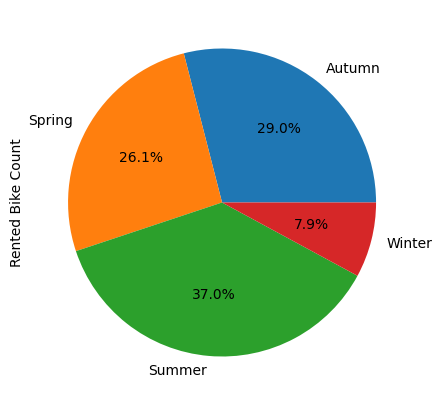

In [ ]:
by_season['Rented Bike Count'].plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(5, 5));

**In summer season rented bike count is higher.**

### **Rented bike count in respective month.**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

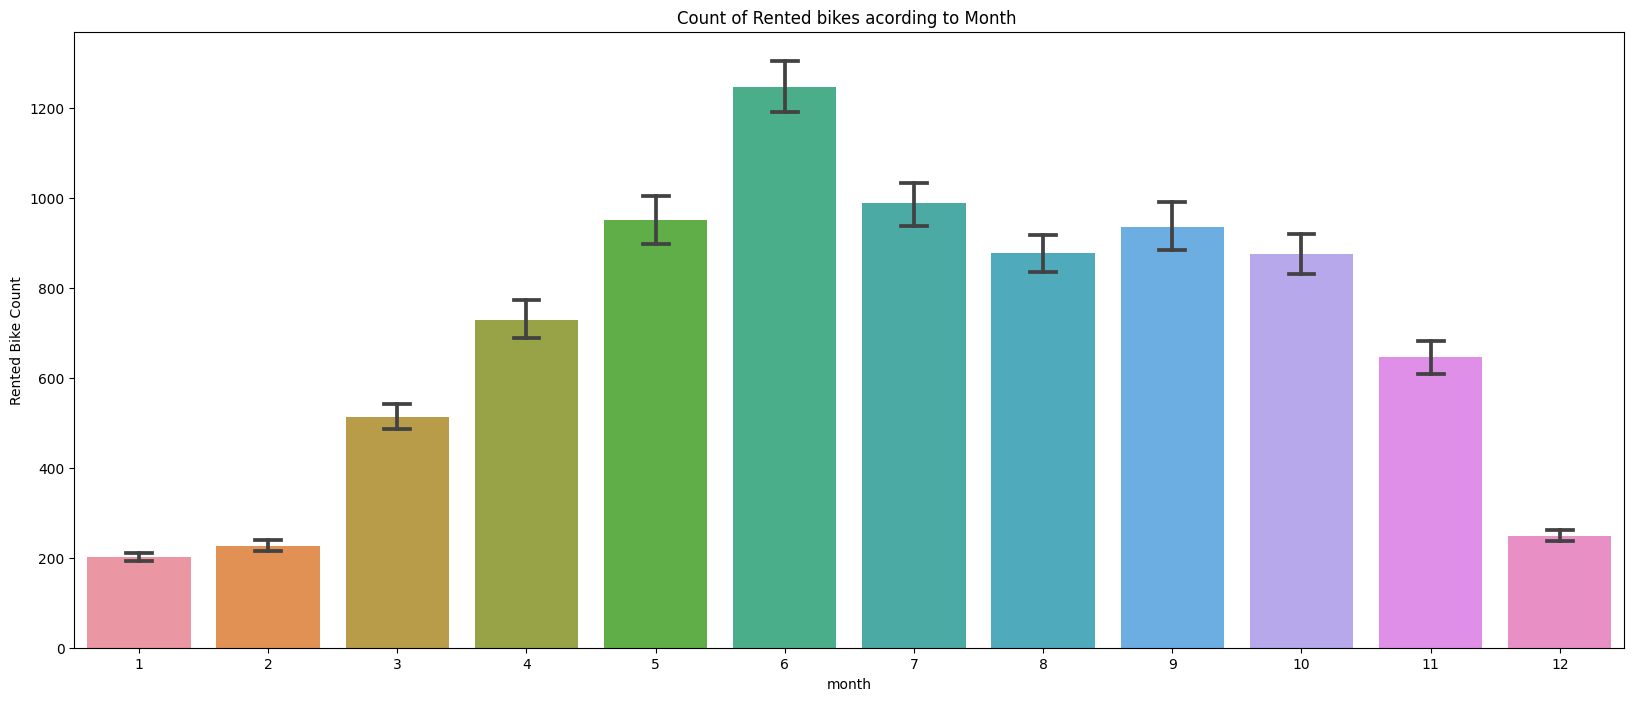

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=Bike_df,x='month',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

**From the above bar plot visualization in 5 to  10 month have higher demand of rented bike and in June little bit much higher, and in January and Febuarary have less demand.**

### <b>Count of Rented Bike According to Hour</b>

[Text(0.5, 1.0, 'Count of Rented Bike According to Hour')]

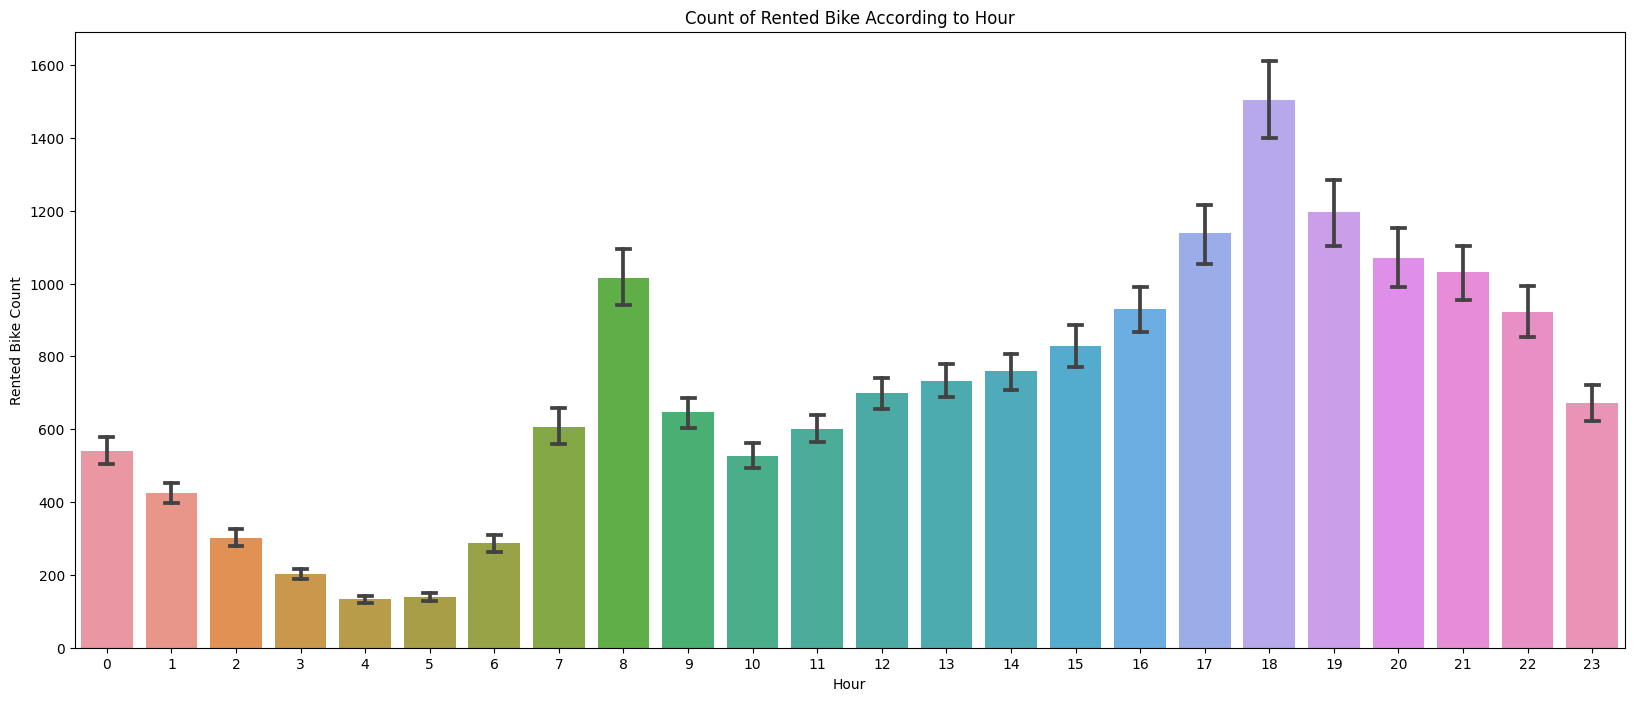

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=Bike_df,x='Hour',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented Bike According to Hour')

**This visulization shows about uses of Rented Bike for all over the year, in which Bikes are higher demanded at 7am to 9am and 5pm to 7pm  because of working Hours.**

###<b>Count of rented bike on weekdays and weekend days</b>

[Text(0.5, 1.0, 'Count of Rented bikes according to weekdays and weekend days')]

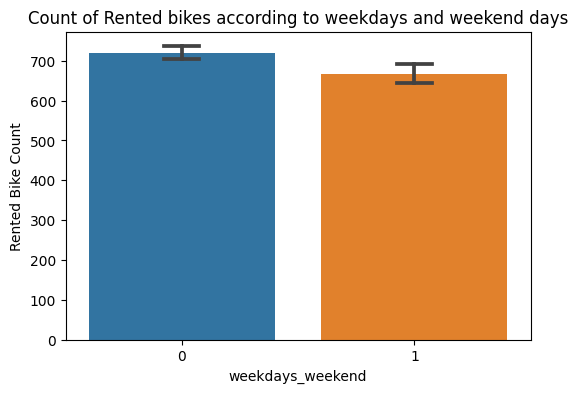

In [ ]:
fig,ax=plt.subplots(figsize=(6,4))
sns.barplot(data=Bike_df,x='weekdays_weekend',y='Rented Bike Count',ax=ax,capsize=0.15)
ax.set(title='Count of Rented bikes according to weekdays and weekend days')

[Text(0.5, 1.0, 'Count of Rented Bike according to weekdays_weekend')]

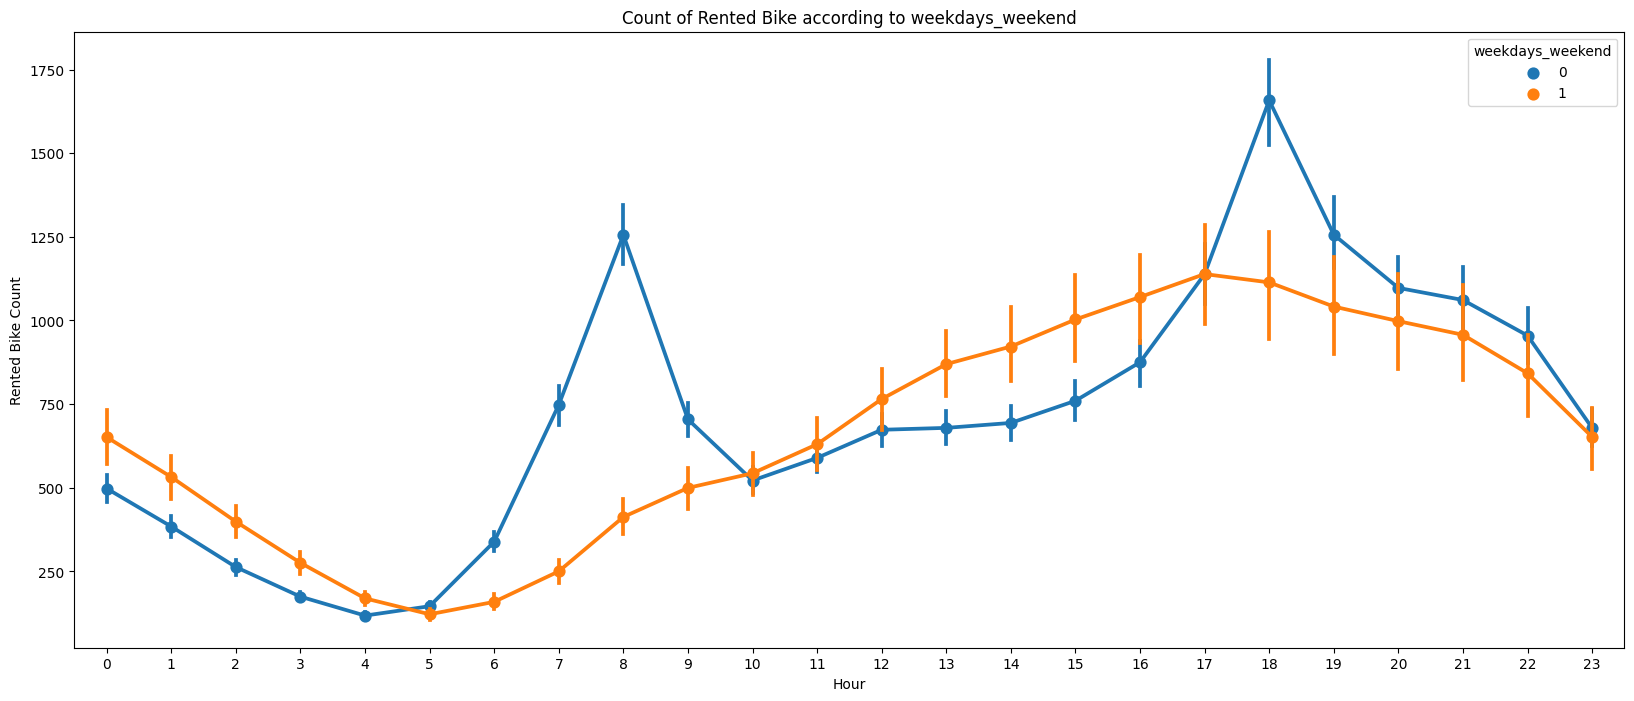

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=Bike_df,x='Hour',y='Rented Bike Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented Bike according to weekdays_weekend')

**Here we visualize that the week days shows the demand of the bike is little bit higher because it is a office time. That is shown on blue colour.**

### <b>Count Plot for Functioning Day.</b>

[Text(0.5, 1.0, 'Count for rental bike according to Functioning Day')]

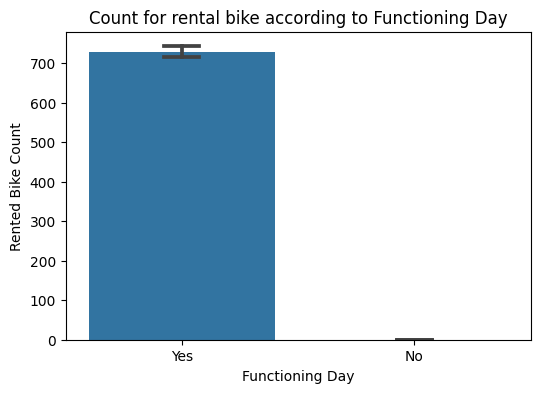

In [ ]:
fig,ax=plt.subplots(figsize=(6,4))
sns.barplot(data=Bike_df,x='Functioning Day',y='Rented Bike Count',ax=ax,capsize=0.15)
ax.set(title='Count for rental bike according to Functioning Day')

**From the barplot is shows that Rented bike is used in Functioning Day and it might not be used in non-functioning day**.

## <b>Numerical Features</b>

* Numerical features are continous values that can be measured on a scale or the numbers that describe an object's various properties.

### <b>Why ?</b>
* In machine learning, vectorization converts the textual data into numerical data. It's a crucial task because machine learning techniques can't be used directly on text, as they only support numerical input.

In [ ]:
# Assign the numerical column to variables
numerical_columns=list(Bike_df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

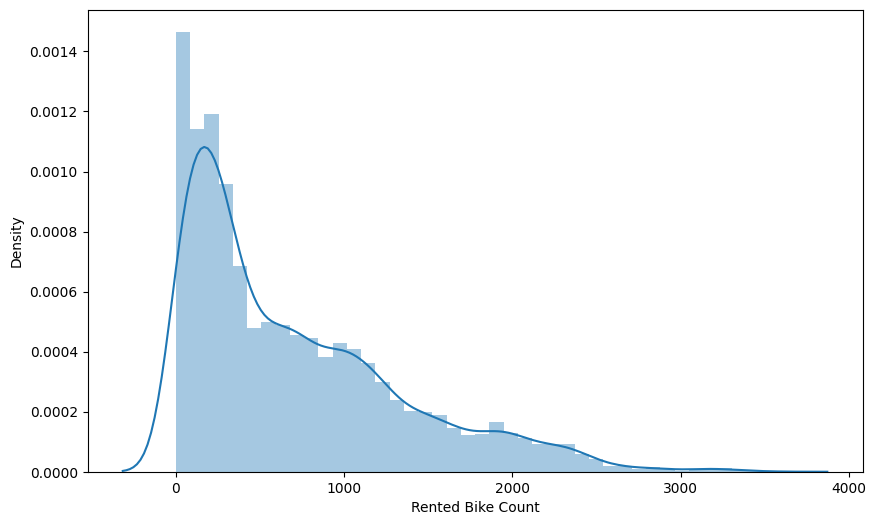

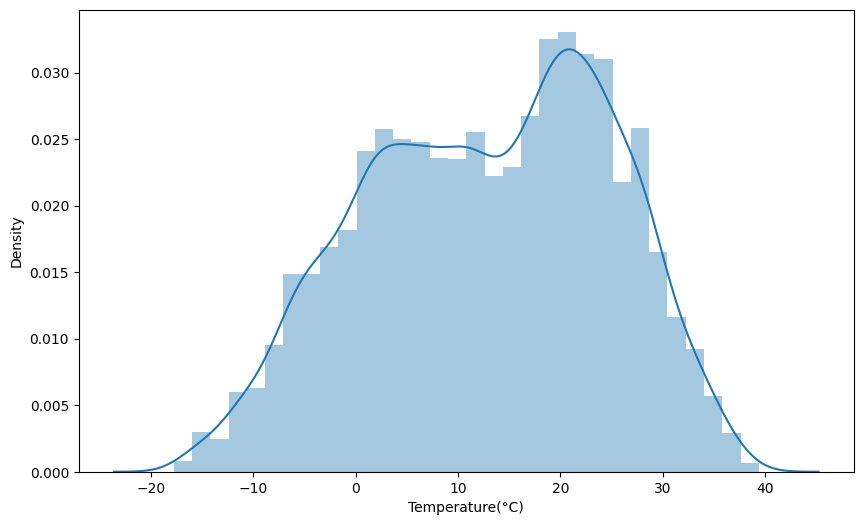

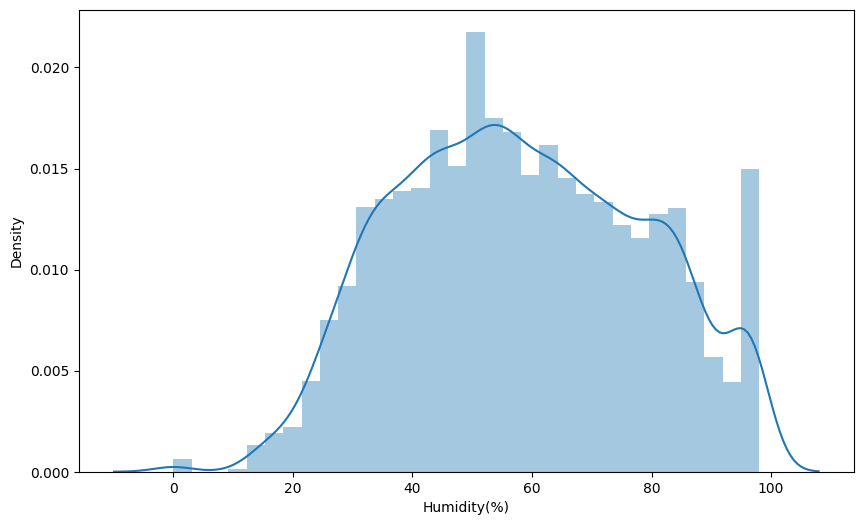

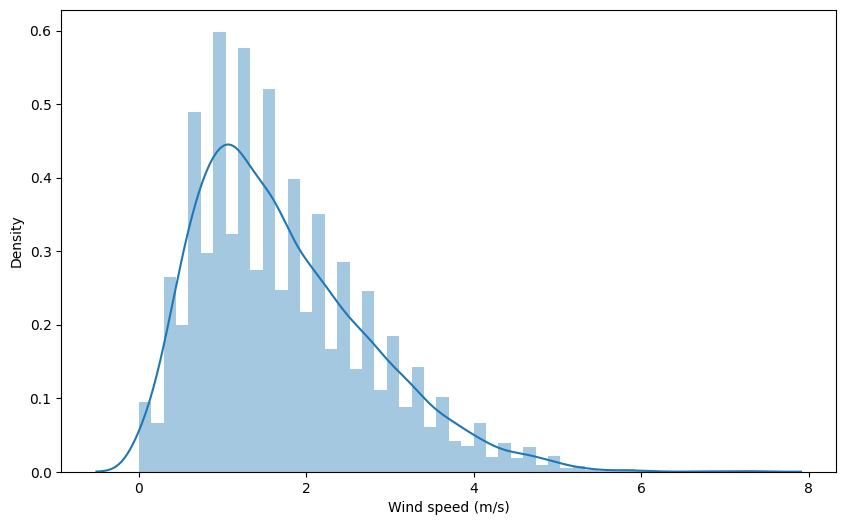

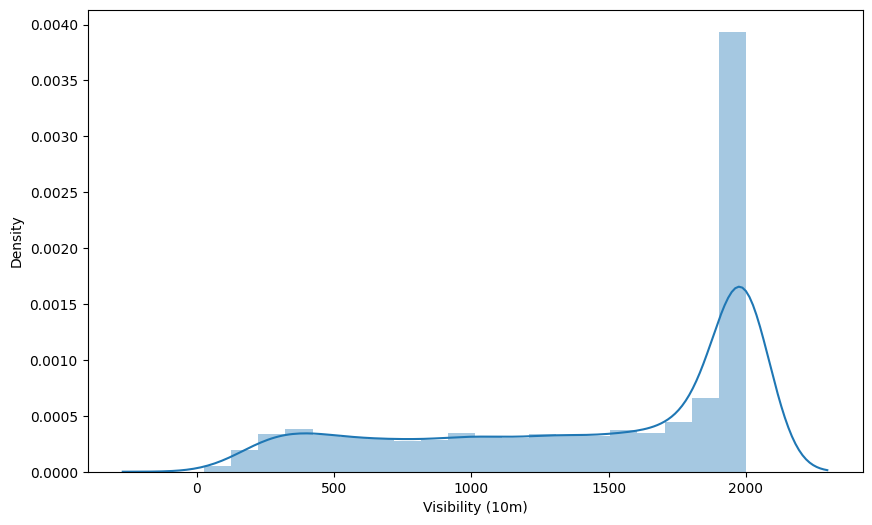

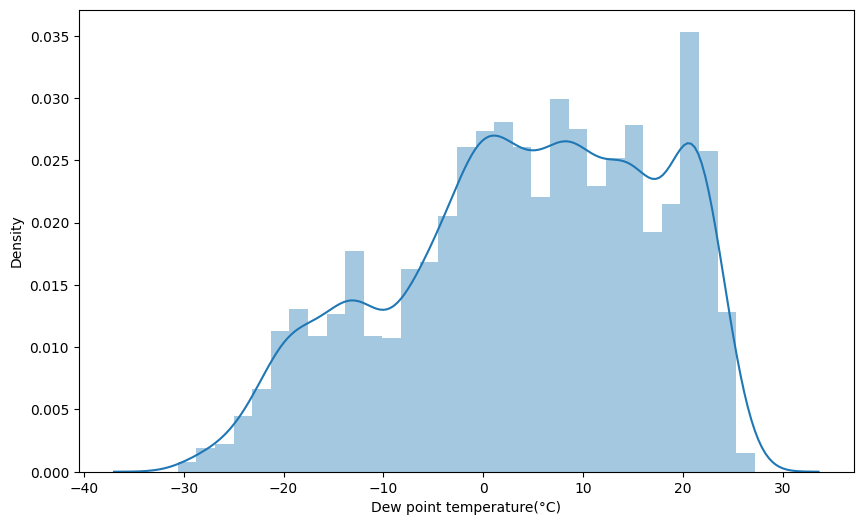

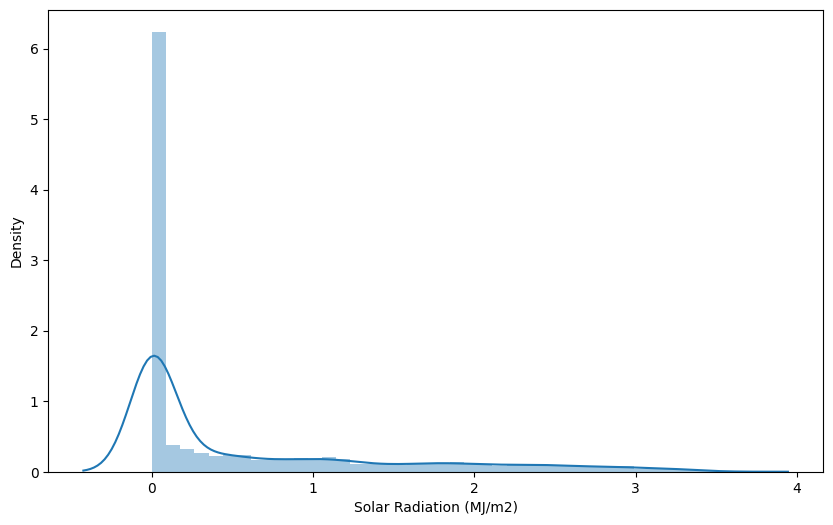

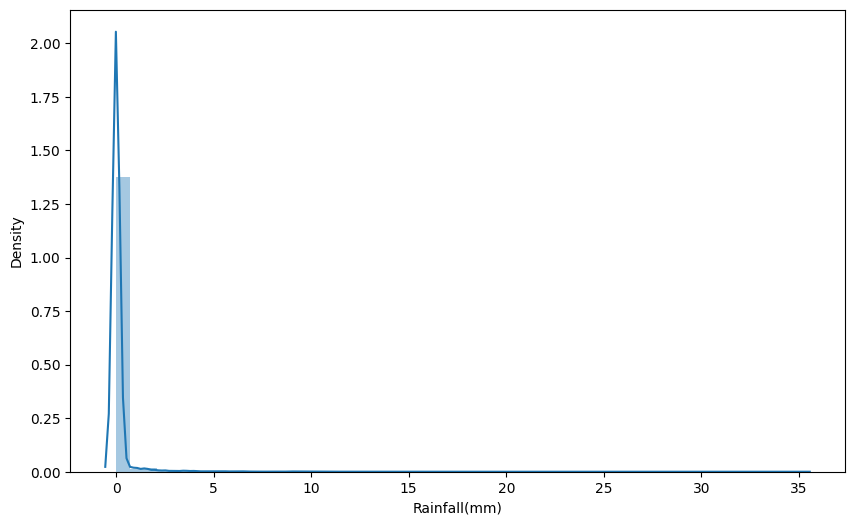

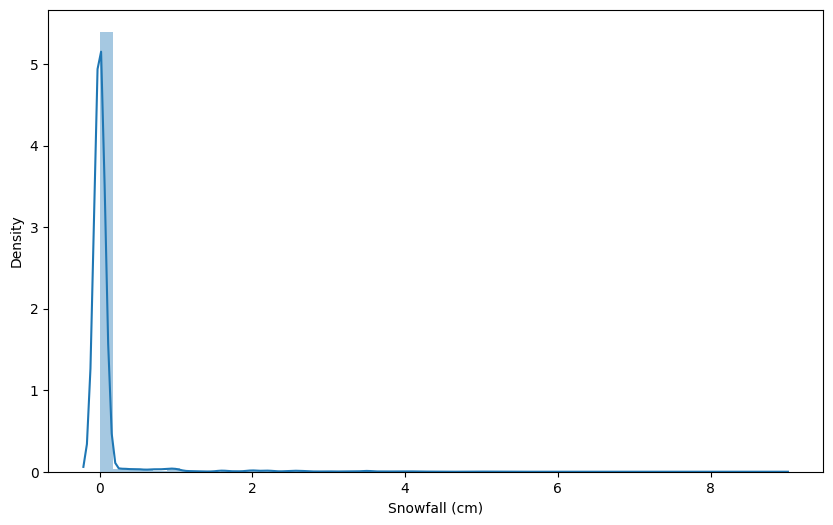

In [ ]:
# Here we see the distribution of all numerical features of dataframe.
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=Bike_df[col])
  plt.xlabel(col)
plt.show()


### **Rented bike count as per hour, holidays, seasons, functional days.**

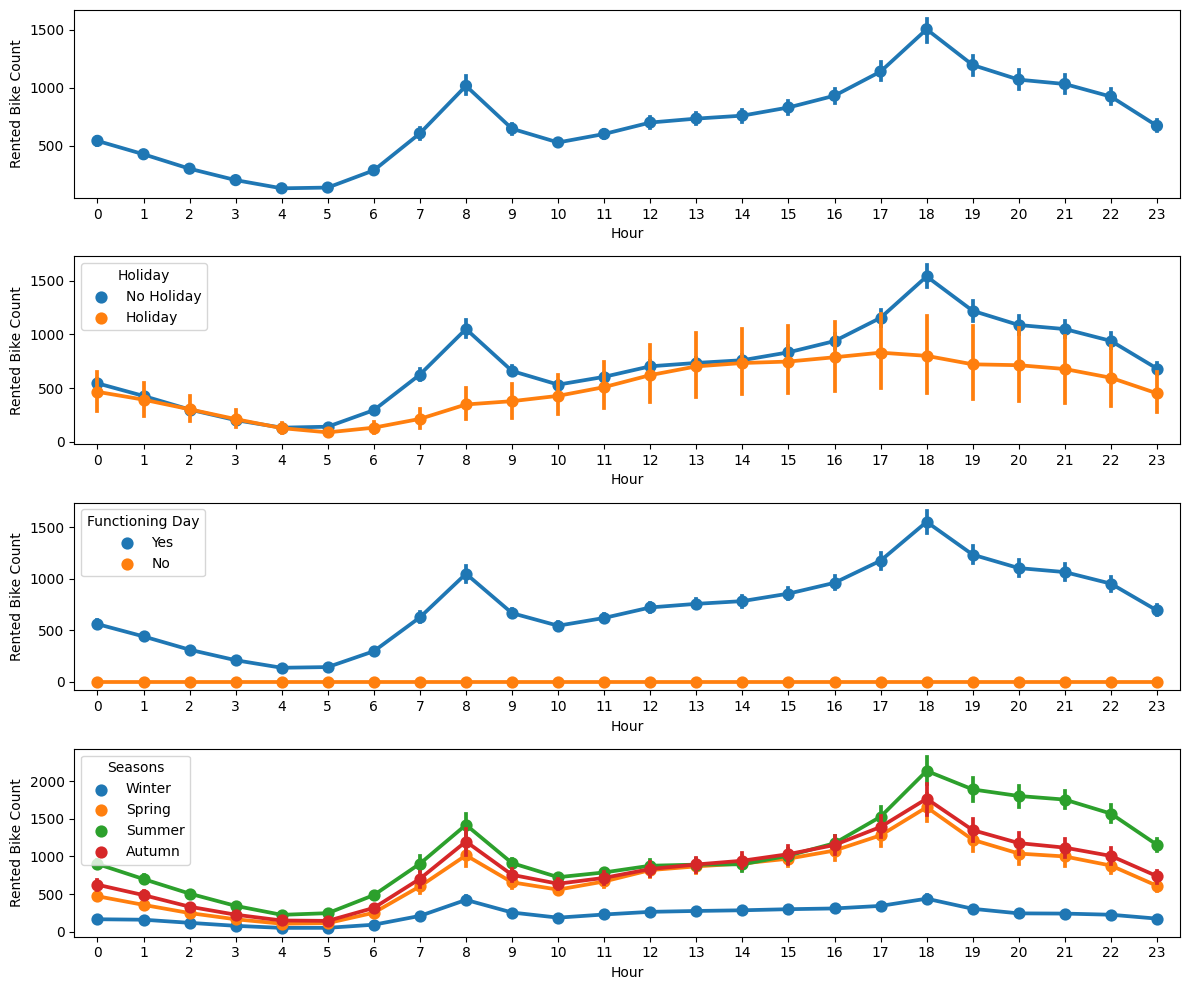

In [ ]:


fig, axs = plt.subplots(nrows=4,ncols=1,figsize=(12,10), dpi=100)
sns.pointplot(data=Bike_df, x="Hour", y="Rented Bike Count", ax=axs[0])
sns.pointplot(data=Bike_df, x="Hour", y="Rented Bike Count", ax=axs[1],
              hue="Holiday")
sns.pointplot(data=Bike_df, x="Hour", y="Rented Bike Count", ax=axs[2],
              hue="Functioning Day")
sns.pointplot(data=Bike_df, x="Hour", y="Rented Bike Count", ax=axs[3],
              hue="Seasons")
plt.tight_layout()

1) **On the behalf of hour, the plot shows at 8th hour and 18th hour have maximum bookings.**

2) **2nd plot shows the relation between the holiday and non-holiday on hourly basis.**

3) **4th plot shows the data of relation between hourly and seasonly basis.**

### **Relation between Temperature and Rental Bike Count**

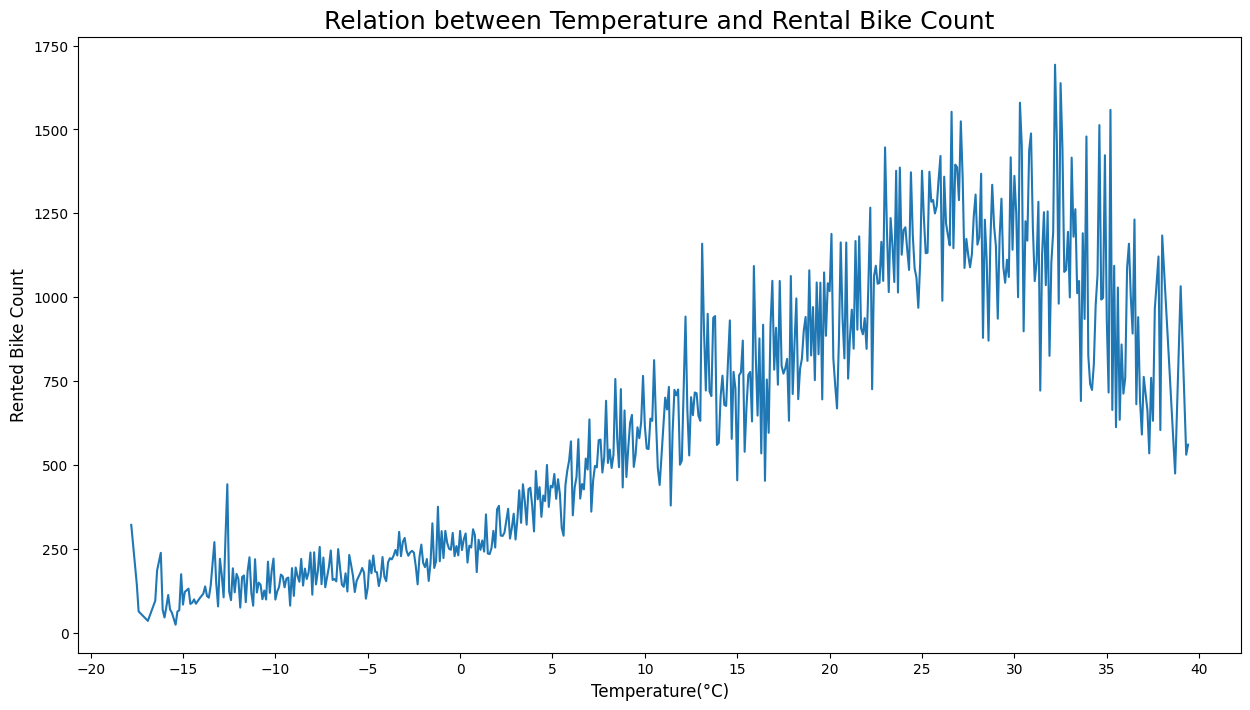

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



df_t = Bike_df.groupby('Temperature(°C)').agg({'Rented Bike Count': 'mean'}).reset_index()

plt.rcParams['figure.figsize'] = 15, 8
sns.lineplot(data=df_t, x='Temperature(°C)', y='Rented Bike Count')
plt.xticks(np.arange(-20, 45, 5))
plt.xlabel('Temperature(°C)', fontsize=12)
plt.ylabel('Rented Bike Count', fontsize=12)
plt.title('Relation between Temperature and Rental Bike Count', fontsize=18)

plt.show()  # Display the plot


**From the above line chart, It shows that when a temperature are modest around 25 to 35 degree celcius there have a  higher demand for rented bike.**

### **Regression Plot**

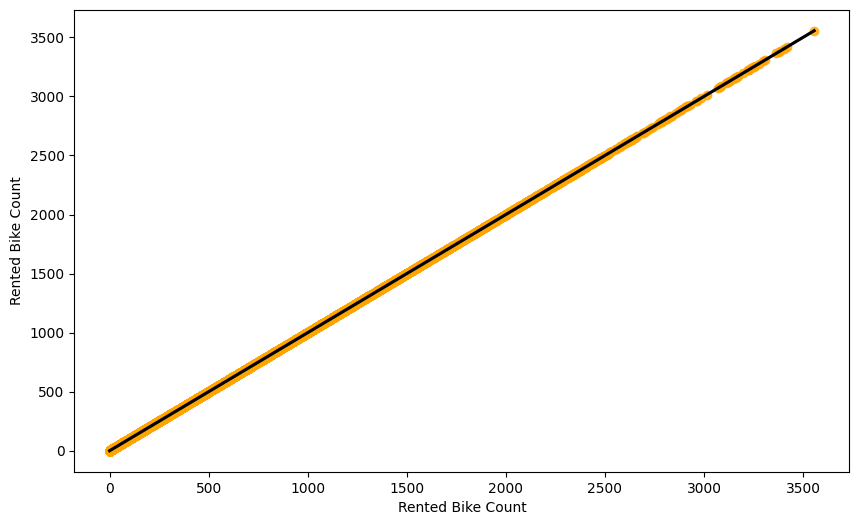

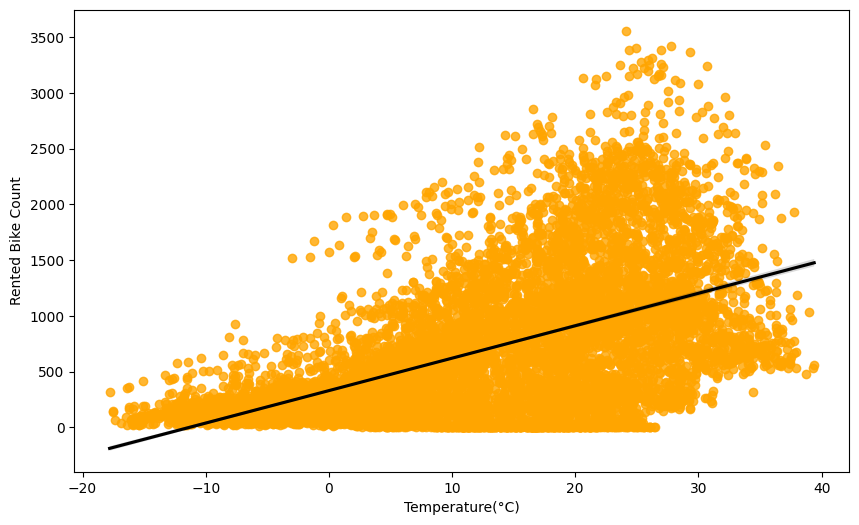

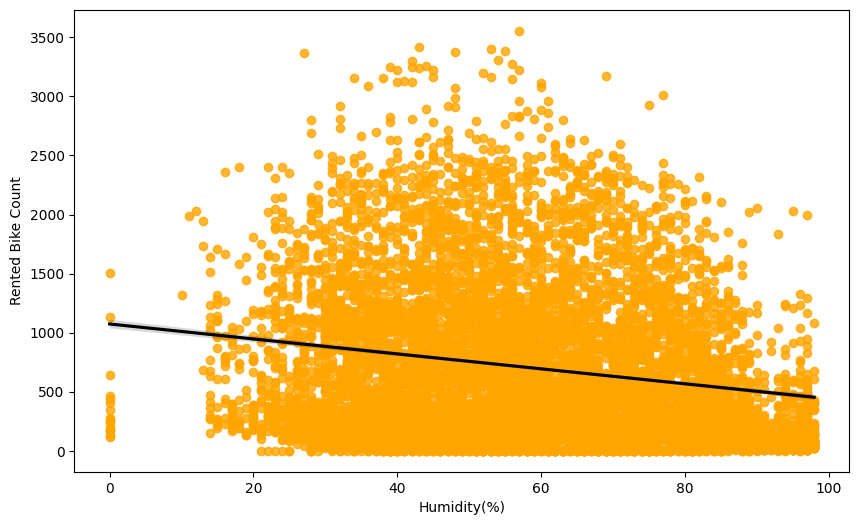

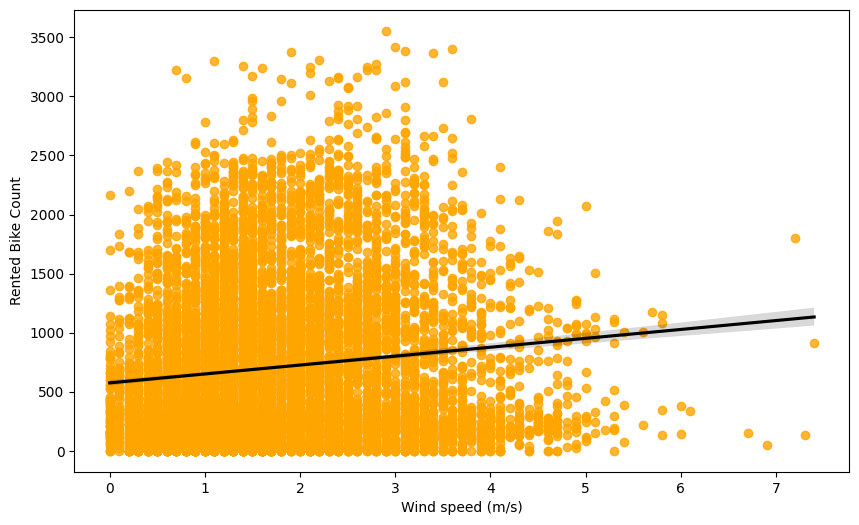

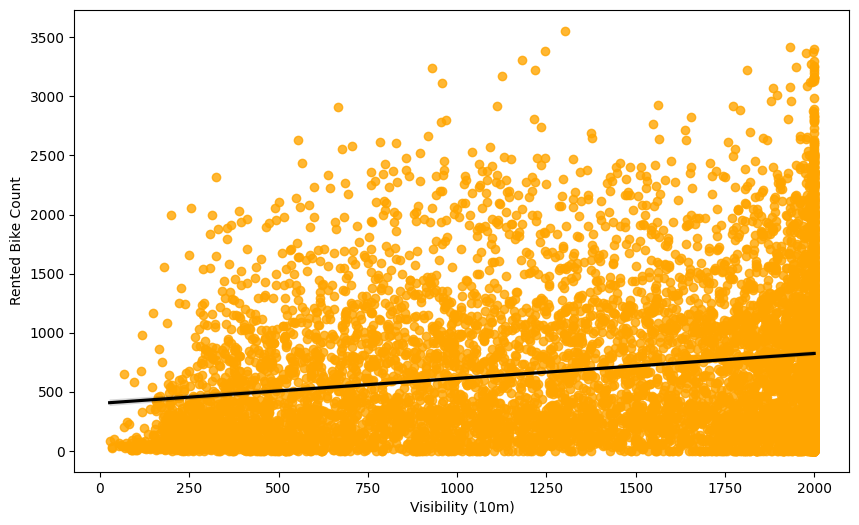

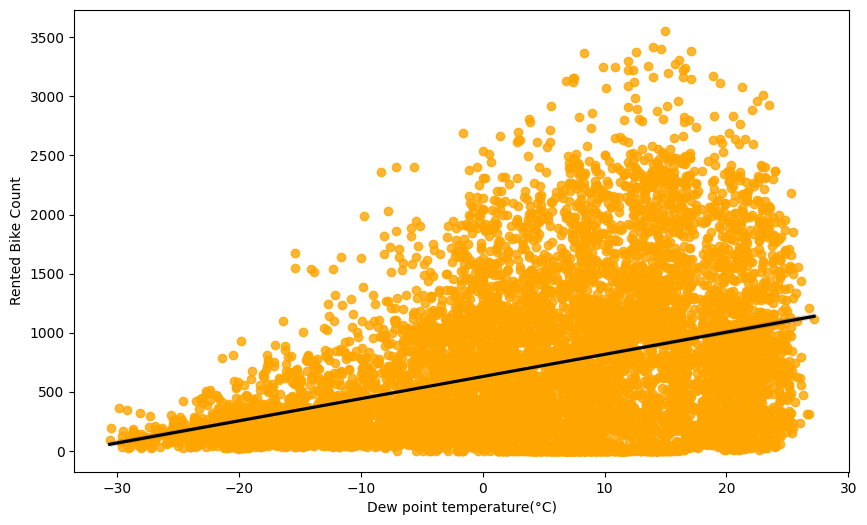

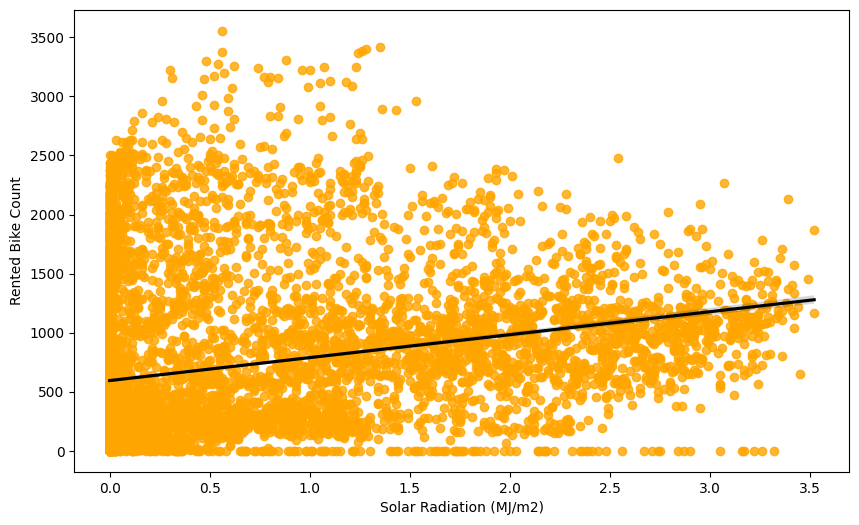

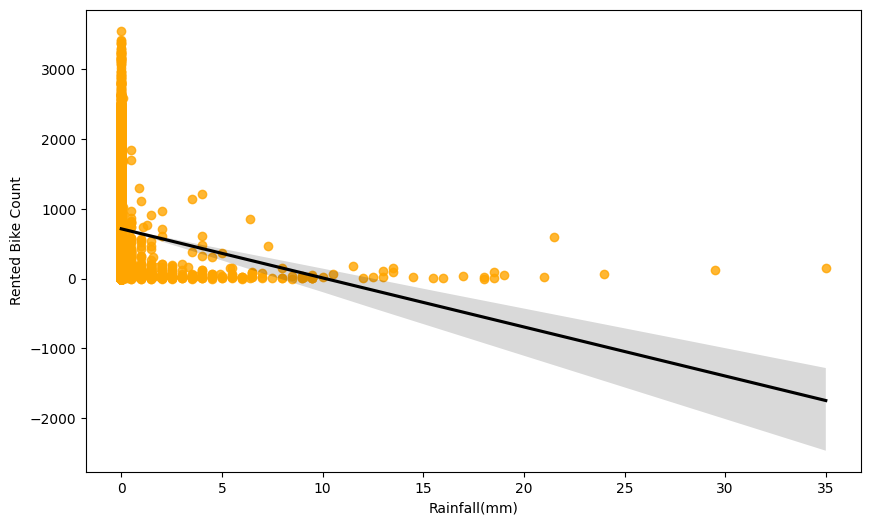

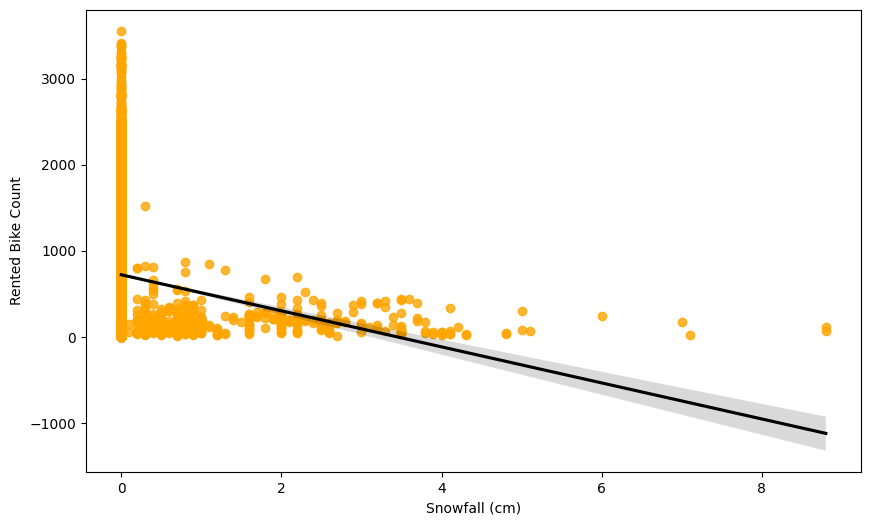

In [ ]:
# Regression plot for all the numerical features.
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=Bike_df[col],y=Bike_df['Rented Bike Count'],scatter_kws={"color":'orange'}, line_kws={"color":'black'})

 * **The above regression plot for all the numerical features here we see that the columns "Temperature", "wind speed",  "visibility", "Dew point temperature", "Solar Rdiation" are positively relation to the target variable.**

*  **Which means rented bike count increases with increment on these features.**

* **"Ranifall", "Snowfall", "Humidity" these features are negatively related to the target variable which means that rented bike count decreases when these features are increases.**


# <b>Feature Engineering</b>



### **Normalizing the Rented Bike Count column data.**

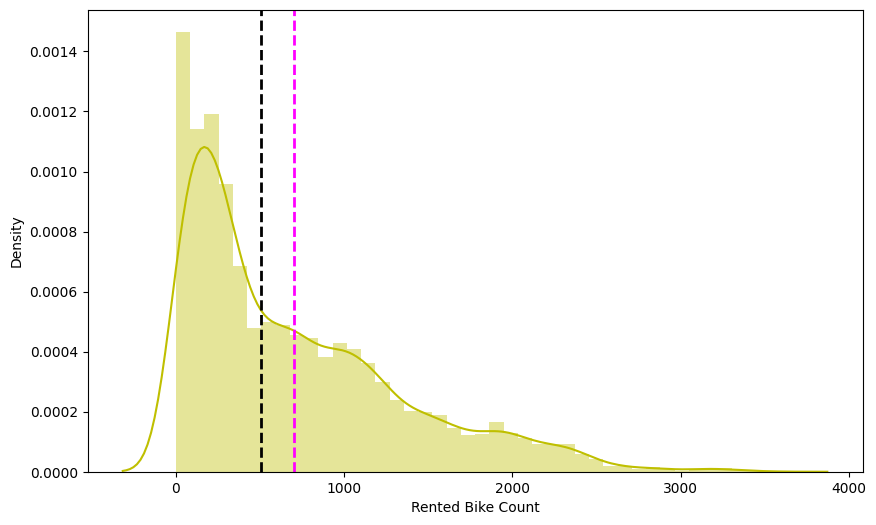

In [ ]:
# Distribution plot for Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(Bike_df['Rented Bike Count'], hist=True ,color="y")
ax.axvline(Bike_df['Rented Bike Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(Bike_df['Rented Bike Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()


**This graph shows that Rented Bike Count has moderate right skewness. However, the assumption for linear regression is that dependent variables distribution should be normal, we need to apply some transformation to make it normal.**

<Axes: xlabel='Rented Bike Count', ylabel='Rented Bike Count'>

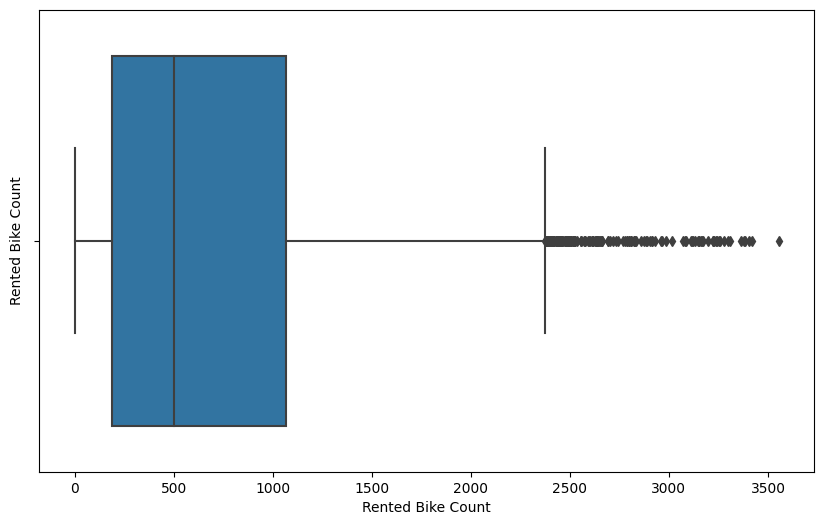

In [ ]:
#Box plot for Rented Bike Count for checking outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented Bike Count')
sns.boxplot(x=Bike_df['Rented Bike Count'])


* **From the above boxplot we have detect outliers in Rented Bike  Count Column.**

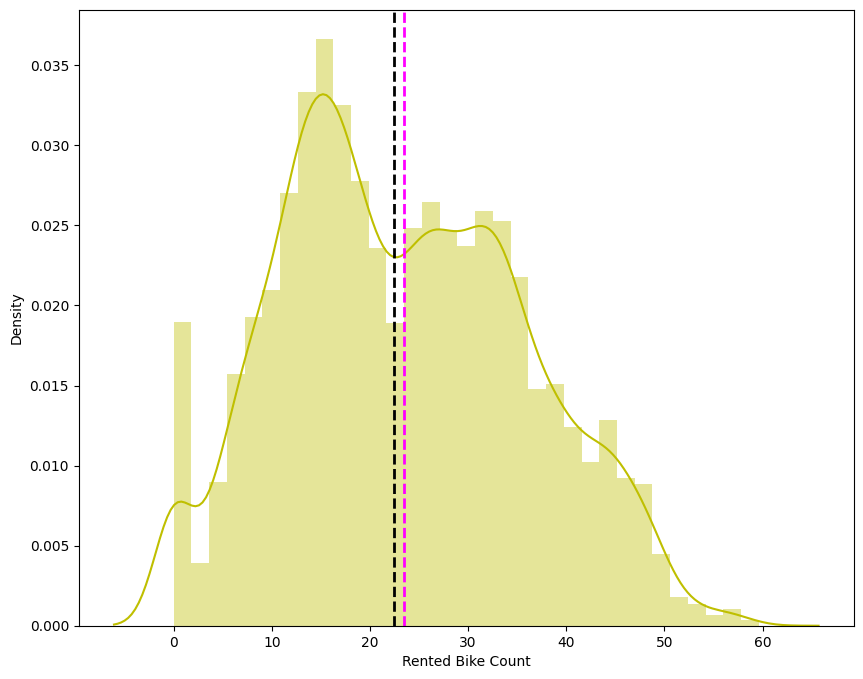

In [ ]:
# Here we applying square root to Rented Bike Count to improve skewness.
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(Bike_df['Rented Bike Count']), color="y")
ax.axvline(np.sqrt(Bike_df['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(Bike_df['Rented Bike Count']).median(), color='black', linestyle='dashed', linewidth=2)


* **Here we are applying the generic rule of taking the square root of skewed variables in order to make it normal, so here we got after applying square root transformation to square root to the skewed Rented Bike count, so here we got almost normal distribution.**

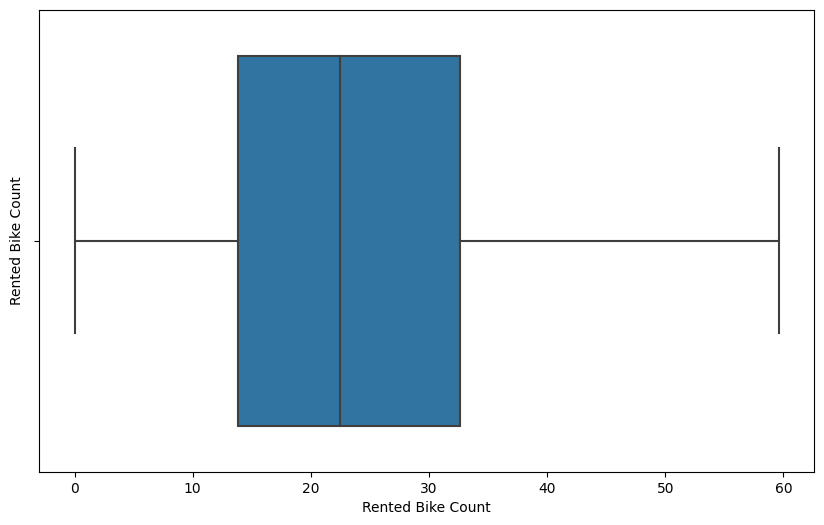

In [ ]:
plt.figure(figsize=(10,6))

plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(Bike_df['Rented Bike Count']))
plt.show()

**After applying square root transformation to Rented Bike Count column, we found that there is no outliers are present.**

## <b>Checking of Correlation between variables</b>

### **Checking in OLS Model**
**Ordinary Least Squares regression (OLS) is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent variables and a dependent variable.**

In [ ]:
# Importing the module
# Assign the 'X' and 'Y' value
# Checking in OLS Model
import statsmodels.api as sm
X = Bike_df[[ 'Temperature(°C)',	'Humidity(%)',
             'Wind speed (m/s)',	'Visibility (10m)', 	'Dew point temperature(°C)',
              'Solar Radiation (MJ/m2)',	'Rainfall(mm)',	'Snowfall (cm)']]
Y = Bike_df['Rented Bike Count']
Bike_df.head()

Rented Bike Count Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254    0             -5.2           37               2.2   
1                204    1             -5.5           38               0.8   
2                173    2             -6.0           39               1.0   
3                107    3             -6.2           40               0.9   
4                 78    4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day month  \
0           0.0            0.0  Winter  No Holiday             Yes    12   
1           0.0            0.0  Winter  No Holiday             Yes    12   
2           0.0            0.0  Winter  No Holiday             Yes    12   
3           0.0            0.0  Winter  No Holiday             Yes    12   
4           0.0            0.0  Winter  No Holiday             Yes    12   

  weekdays_weekend  
0                0  
1                0  
2                0  
3                0  
4                0

In [ ]:
#add a constant column
X = sm.add_constant(X)
X

const  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0       1.0             -5.2           37               2.2              2000   
1       1.0             -5.5           38               0.8              2000   
2       1.0             -6.0           39               1.0              2000   
3       1.0             -6.2           40               0.9              2000   
4       1.0             -6.0           36               2.3              2000   
...     ...              ...          ...               ...               ...   
8755    1.0              4.2           34               2.6              1894   
8756    1.0              3.4           37               2.3              2000   
8757    1.0              2.6           39               0.3              1968   
8758    1.0              2.1           41               1.0              1859   
8759    1.0              1.9           43               1.3              1909   

      Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                         -17.6                      0.0           0.0   
1                         -17.6                      0.0           0.0   
2                         -17.7                      0.0           0.0   
3                         -17.6                      0.0           0.0   
4                         -18.6                      0.0           0.0   
...                         ...                      ...           ...   
8755                      -10.3                      0.0           0.0   
8756                       -9.9                      0.0           0.0   
8757                       -9.9                      0.0           0.0   
8758                       -9.8                      0.0           0.0   
8759                       -9.3                      0.0           0.0   

      Snowfall (cm)  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
...             ...  
8755            0.0  
8756            0.0  
8757            0.0  
8758            0.0  
8759            0.0  

[8760 rows x 9 columns]

In [ ]:
# Here we fit the OLS Model
model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     723.1
Date:                Tue, 05 Sep 2023   Prob (F-statistic):               0.00
Time:                        06:58:23   Log-Likelihood:                -66877.
No. Observations:                8760   AIC:                         1.338e+05
Df Residuals:                    8751   BIC:                         1.338e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       844.6495    106.296      7.946      0.000     636.285    1053.014
Temperature(°C)              36.5270      4.169      8.762      0.000      28.355      44.699
Humidity(%)                 -10.5077      1.184     -8.872      0.000     -12.829      -8.186
Wind speed (m/s)             52.4810      5.661      9.271      0.000      41.385      63.577
Visibility (10m)             -0.0097      0.011     -0.886      0.376      -0.031       0.012
Dew point temperature(°C)    -0.7829      4.402     -0.178      0.859      -9.411       7.846
Solar Radiation (MJ/m2)    -118.9772      8.670    -13.724      0.000    -135.971    -101.983
Rainfall(mm)                -50.7083      4.932    -10.282      0.000     -60.376     -41.041
Snowfall (cm)                41.0307     12.806      3.204      0.001      15.929      66.133
==============================================================================
Omnibus:                      957.371   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1591.019
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       4.412   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* **R squared and Adjusted R squared are closest to each other, 40% of variance in the Rented Bike Count are described by model.**

* **For F statistic, P value is less than 0.05 for 5% of significance level.**

* **P value of Dew Point Temperature and Visibility are extremely high and they are not significant.**

* **The Omnibus test examine the skewness and kurtosis of residuals and in this case the omnibus value is high and it displays it have skewness in data.**

*  **The condition number is large, 3.11e+04, suggests that there may be strong multicollinearity or other numerical issues.**

*  **The Durbin-Waston test is used to detect autocorrelation among variables, and in this case, the value is less than 0.5, that indicates there have postive autocorrelation among the variables.**

In [ ]:
X.corr()

const  Temperature(°C)  Humidity(%)  \
const                        NaN              NaN          NaN   
Temperature(°C)              NaN         1.000000     0.159371   
Humidity(%)                  NaN         0.159371     1.000000   
Wind speed (m/s)             NaN        -0.036252    -0.336683   
Visibility (10m)             NaN         0.034794    -0.543090   
Dew point temperature(°C)    NaN         0.912798     0.536894   
Solar Radiation (MJ/m2)      NaN         0.353505    -0.461919   
Rainfall(mm)                 NaN         0.050282     0.236397   
Snowfall (cm)                NaN        -0.218405     0.108183   

                           Wind speed (m/s)  Visibility (10m)  \
const                                   NaN               NaN   
Temperature(°C)                   -0.036252          0.034794   
Humidity(%)                       -0.336683         -0.543090   
Wind speed (m/s)                   1.000000          0.171507   
Visibility (10m)                   0.171507          1.000000   
Dew point temperature(°C)         -0.176486         -0.176630   
Solar Radiation (MJ/m2)            0.332274          0.149738   
Rainfall(mm)                      -0.019674         -0.167629   
Snowfall (cm)                     -0.003554         -0.121695   

                           Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
const                                            NaN                      NaN   
Temperature(°C)                             0.912798                 0.353505   
Humidity(%)                                 0.536894                -0.461919   
Wind speed (m/s)                           -0.176486                 0.332274   
Visibility (10m)                           -0.176630                 0.149738   
Dew point temperature(°C)                   1.000000                 0.094381   
Solar Radiation (MJ/m2)                     0.094381                 1.000000   
Rainfall(mm)                                0.125597                -0.074290   
Snowfall (cm)                              -0.150887                -0.072301   

                           Rainfall(mm)  Snowfall (cm)  
const                               NaN            NaN  
Temperature(°C)                0.050282      -0.218405  
Humidity(%)                    0.236397       0.108183  
Wind speed (m/s)              -0.019674      -0.003554  
Visibility (10m)              -0.167629      -0.121695  
Dew point temperature(°C)      0.125597      -0.150887  
Solar Radiation (MJ/m2)       -0.074290      -0.072301  
Rainfall(mm)                   1.000000       0.008500  
Snowfall (cm)                  0.008500       1.000000

* **On the OLS model, here we found that there are high coorelation between "Temperature" and "Dew Point Temperature" . So here we need to drop one variable.**

* **Here we check the (P>|t|) value for deciding which one i drop. So in table we found that the "Dew Point Temperature" value is high, that's indicate less siginficant, so here we drop Dew Point Temperature Column".**

  
* **To make decision more clear, in next step we draw a heatmap.**


# **HeatMap**

**A correlation heatmap is a graphical representation that shows the correlation matrix, which helps to understand the correlation between different variables.**

<Axes: >

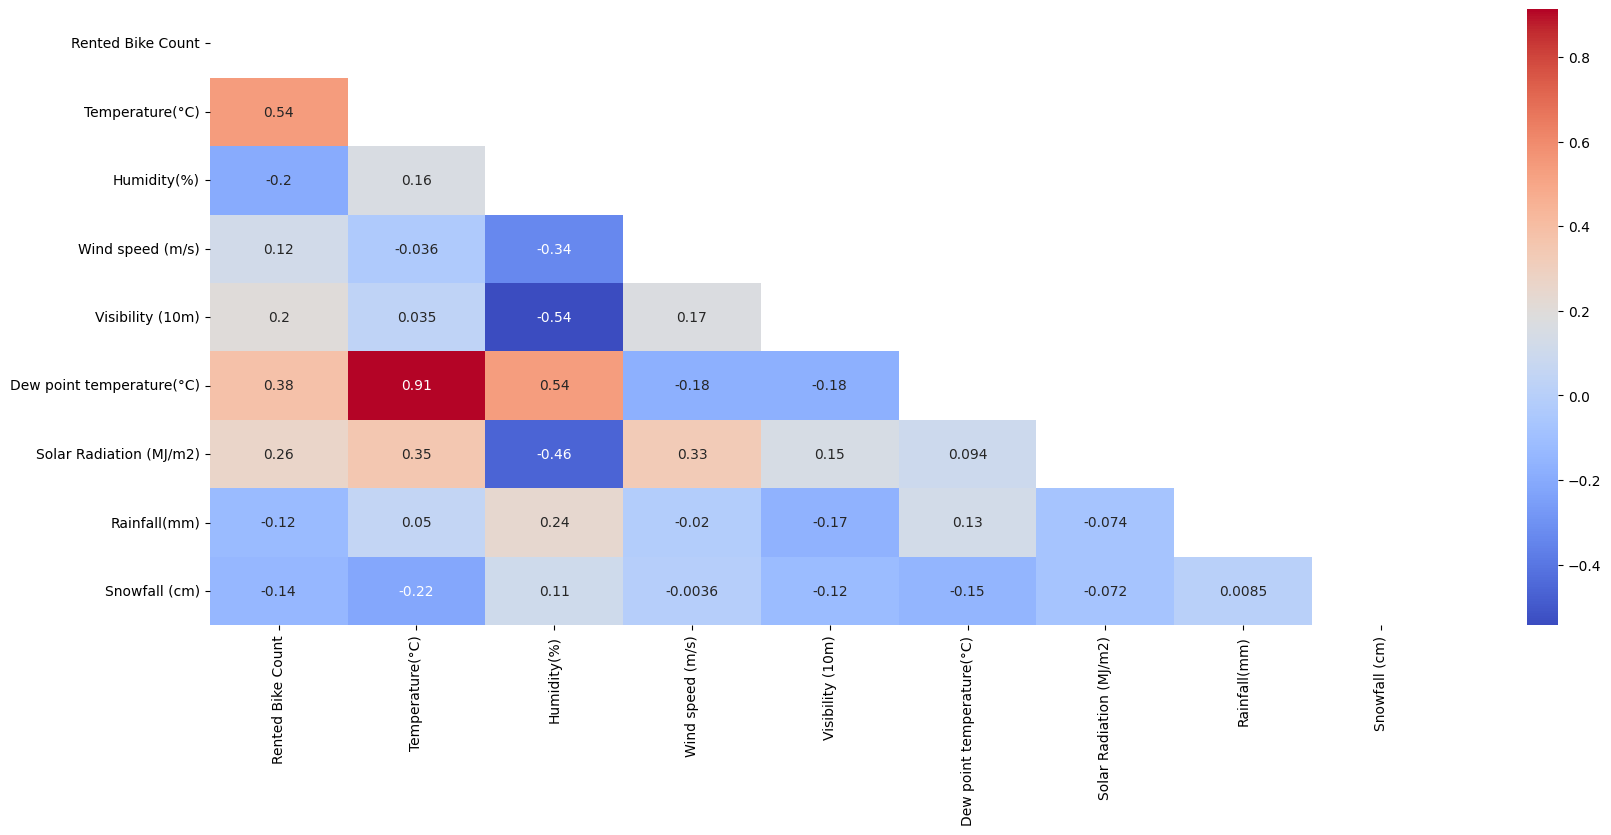

In [ ]:
plt.figure(figsize=(20,8))
correlation=Bike_df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True,cmap='coolwarm')

**In the heatmap we can observe that the target variable line the most positively correlated variables to the rent are :**

 * the temperature

 * the dew point temperature

 * the solar radiation.

**And most negatively coorelated are :**

 * Humidity

 * Rainfall


Based on Correlation heatmap, here we observe the correlation between columns 'Temperature' and 'Dew point temperature' is 0.91 so here if we drop this column then it don't affects the outcome of our analysis.  And they have the same variations.  So here we can drop the column 'Dew point temperature(°C).

In [ ]:
# Droping the "Dew point temperature"  column.
Bike_df=Bike_df.drop(['Dew point temperature(°C)'],axis=1)

In [ ]:
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Rented Bike Count        8760 non-null   int64   
 1   Hour                     8760 non-null   category
 2   Temperature(°C)          8760 non-null   float64 
 3   Humidity(%)              8760 non-null   int64   
 4   Wind speed (m/s)         8760 non-null   float64 
 5   Visibility (10m)         8760 non-null   int64   
 6   Solar Radiation (MJ/m2)  8760 non-null   float64 
 7   Rainfall(mm)             8760 non-null   float64 
 8   Snowfall (cm)            8760 non-null   float64 
 9   Seasons                  8760 non-null   object  
 10  Holiday                  8760 non-null   object  
 11  Functioning Day          8760 non-null   object  
 12  month                    8760 non-null   category
 13  weekdays_weekend         8760 non-null   category
dtypes: categ

In [ ]:
# Impute all the categorical features to variable
categorical_features=list(Bike_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month',
       'weekdays_weekend'],
      dtype='object')

# **One Hot Encoding**

One Hot Encoding is the conversion of categorical information or variables into numerical values that may be fed into machine learning algorithms to improve the prediction accuraccy.

In [ ]:
Bike_df_copy = Bike_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    Bike_df_copy = one_hot_encoding(Bike_df_copy, col)
Bike_df_copy.head()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Hour_1  Hour_2  ...  month_4  month_5  month_6  month_7  month_8  month_9  \
0       0       0  ...        0        0        0        0        0        0   
1       1       0  ...        0        0        0        0        0        0   
2       0       1  ...        0        0        0        0        0        0   
3       0       0  ...        0        0        0        0        0        0   
4       0       0  ...        0        0        0        0        0        0   

   month_10  month_11  month_12  weekdays_weekend_1  
0         0         0         1                   0  
1         0         0         1                   0  
2         0         0         1                   0  
3         0         0         1                   0  
4         0         0         1                   0  

[5 rows x 48 columns]

# <b>Train and Test Split for Linear Regression</b>

A train test split is when you split your data into a training set and a testing set. The training set is used for training the model, and the testing set is used to test your model. This allows you to train your models on the training set, and then test thier accuracy on the unseen testing set.

In [ ]:
#Assign the value in X and Y
X = Bike_df_copy.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(Bike_df_copy['Rented Bike Count'])

In [ ]:
X.head()

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0             -5.2           37               2.2              2000   
1             -5.5           38               0.8              2000   
2             -6.0           39               1.0              2000   
3             -6.2           40               0.9              2000   
4             -6.0           36               2.3              2000   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Hour_1  Hour_2  \
0                      0.0           0.0            0.0       0       0   
1                      0.0           0.0            0.0       1       0   
2                      0.0           0.0            0.0       0       1   
3                      0.0           0.0            0.0       0       0   
4                      0.0           0.0            0.0       0       0   

   Hour_3  ...  month_4  month_5  month_6  month_7  month_8  month_9  \
0       0  ...        0        0        0        0        0        0   
1       0  ...        0        0        0        0        0        0   
2       0  ...        0        0        0        0        0        0   
3       1  ...        0        0        0        0        0        0   
4       0  ...        0        0        0        0        0        0   

   month_10  month_11  month_12  weekdays_weekend_1  
0         0         0         1                   0  
1         0         0         1                   0  
2         0         0         1                   0  
3         0         0         1                   0  
4         0         0         1                   0  

[5 rows x 47 columns]

In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

In [ ]:
#Creating test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


In [ ]:
Bike_df_copy.describe().columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'weekdays_weekend_1'],
      dtype='object')

#<b>LINEAR REGRESSION</b>


In [ ]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [ ]:
# check the score
reg.score(X_train, y_train)

0.7722101548255267

In [ ]:
# Check the coefficient
reg.coef_

array([ 5.11538263e-01, -1.27236196e-01, -2.90122073e-02,  9.90615715e-04,
        8.89701409e-01, -1.48171446e+00, -8.13629988e-02, -2.04211065e+00,
       -4.95822637e+00, -7.23630435e+00, -9.51882072e+00, -9.04457949e+00,
       -4.03213994e+00,  2.27462862e+00,  7.54438892e+00,  1.25491521e+00,
       -3.27047269e+00, -3.46014138e+00, -2.74135788e+00, -2.96341191e+00,
       -3.18317912e+00, -1.92136354e+00,  1.11918595e-01,  3.83216182e+00,
        1.02397844e+01,  6.78230326e+00,  6.08102846e+00,  6.20280481e+00,
        5.04597766e+00,  1.46736086e+00, -4.81648861e-01, -1.26348263e+00,
       -4.80391365e+00,  3.51130869e+00,  2.82758278e+01, -8.13449897e-01,
       -1.53946964e+00, -6.75094331e-01,  1.73291511e+00,  4.41327425e+00,
       -1.71047504e+00, -3.96628184e+00,  6.27209321e-01,  3.28833588e+00,
        2.63349995e+00,  2.07210333e+00, -1.42458875e+00])

In [ ]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 35.07751288189293
RMSE : 5.9226271942350825
MAE : 4.474024092996784
R2 : 0.7722101548255267
Adjusted R2 : 0.7672119649454145


**R2 score of model is 0.77, that display our model is able to  capture most of the data variance, so here we should store in dataframe for later comparison.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])


In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 33.27533089591926
RMSE : 5.76847734639907
MAE : 4.410178475318178
R2 : 0.7893518482962683
Adjusted R2 : 0.7847297833429184


<b/>In the test set's r2_score is 0.78, that means our linear model performing good on the data. So here we now visualize our residuals to see there have hetroscedasticity(unequal variance and scatter).</b>

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

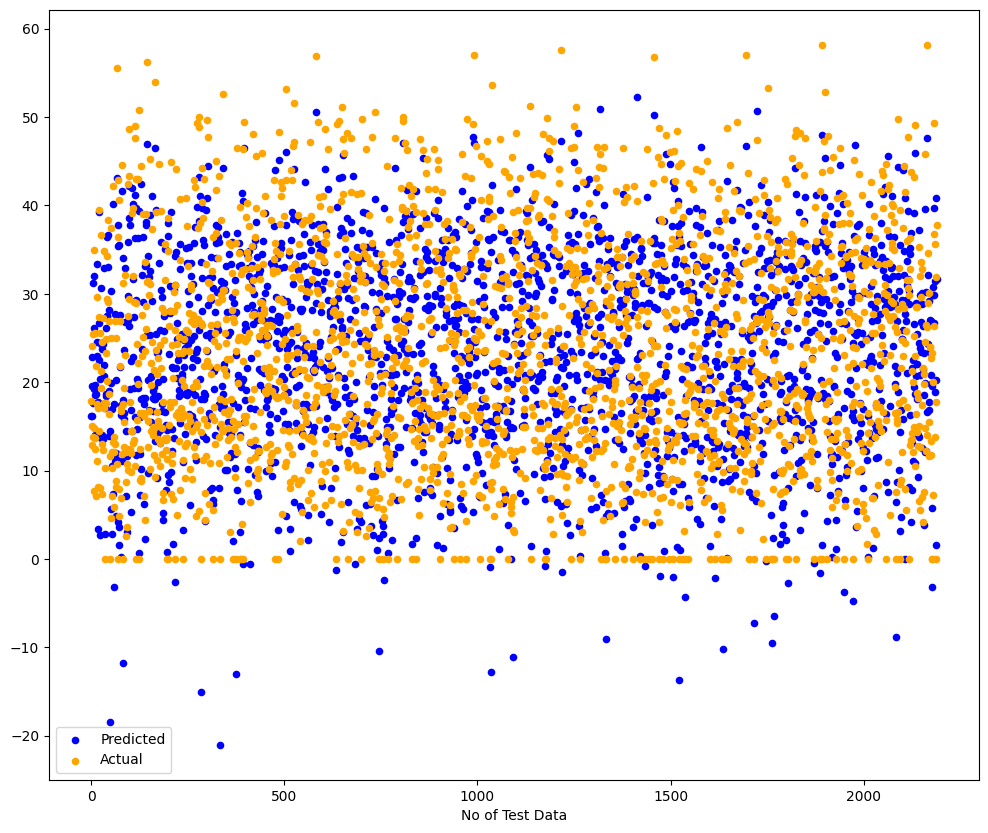

In [ ]:
# Plot the figure
plt.figure(figsize=(12,10))
plt.scatter(range(len(y_pred_test)), y_pred_test, s=20, c='blue', label='Predicted')
plt.scatter(range(len(y_test)), y_test, s=20, c='orange', label='Actual')
plt.legend()
plt.xlabel('No of Test Data')
plt.show()

Text(0.5, 1.0, 'Residual plot')

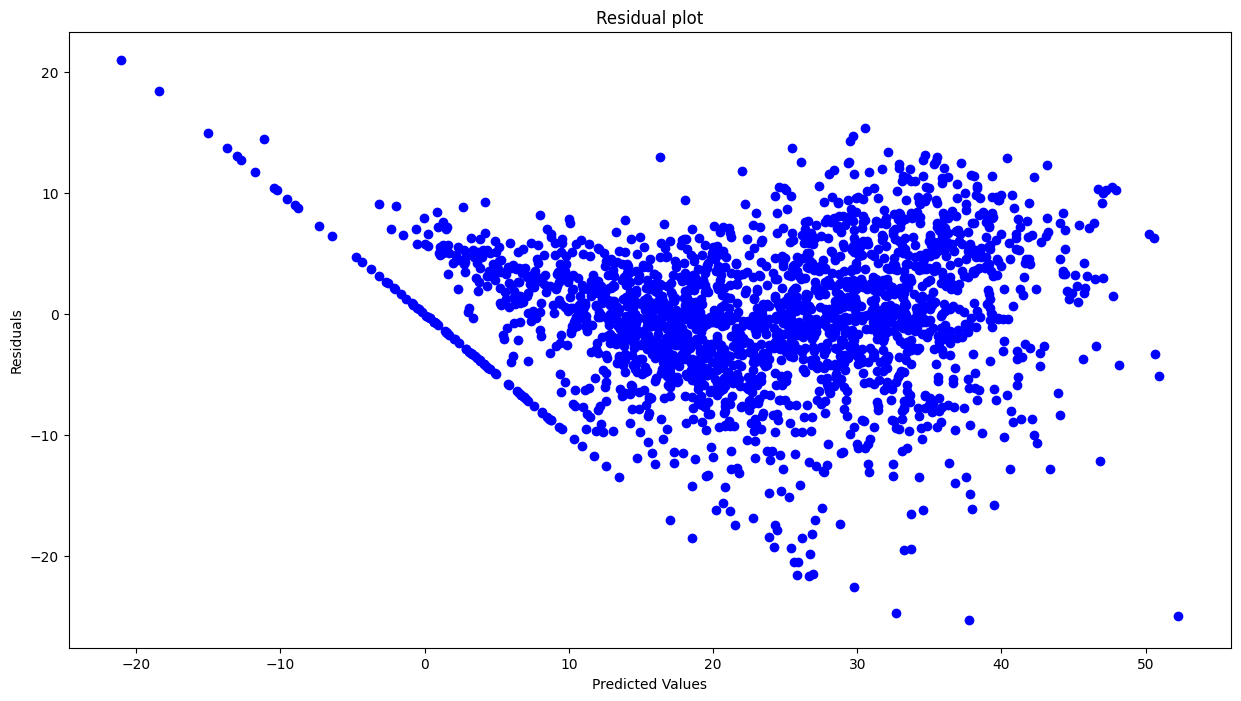

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test),color='blue')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual plot')

#<b/>LASSO REGRESSION</b>

In [ ]:
# Create an instance for Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.3873692800799008 0.40519624904934015


In [ ]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 91.59423336097032
RMSE : 9.570487623991283
MAE : 7.255041571454952
R2 : 0.40519624904934015
Adjusted R2 : 0.3921449996120475


<b/>Here our r2 score value is 0.40, that display our model is not able to captured most of the data variance.  So here we should store in dataframe for later comparison.</b>

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 96.7750714044618
RMSE : 9.837432155011886
MAE : 7.455895061963607
R2 : 0.3873692800799008
Adjusted R2 : 0.37392686932535146


<b/>In the test set's r2_score is 0.38, that means our linear model is not performing good on the data. So here we now visualize our residuals to see there have hetroscedasticity(unequal variance and scatter).</b>



In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

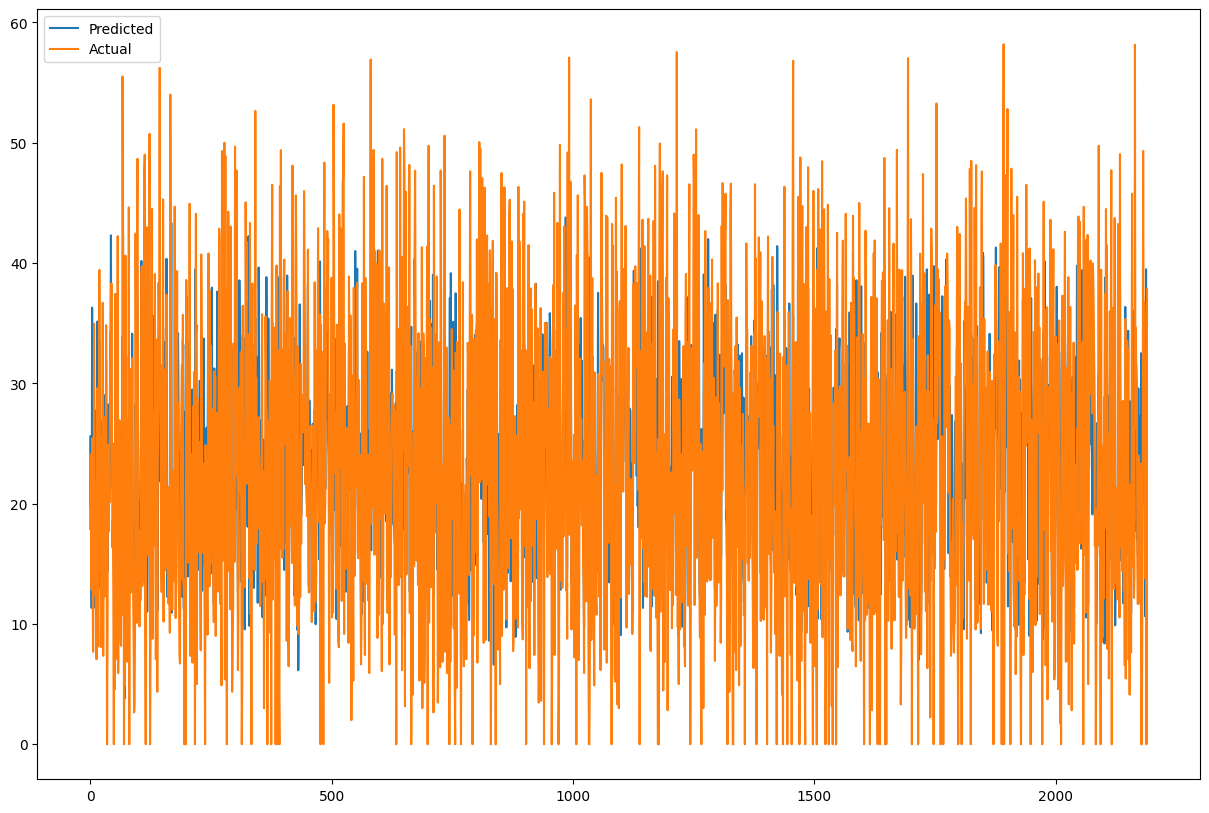

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 1.0, 'Residual plot')

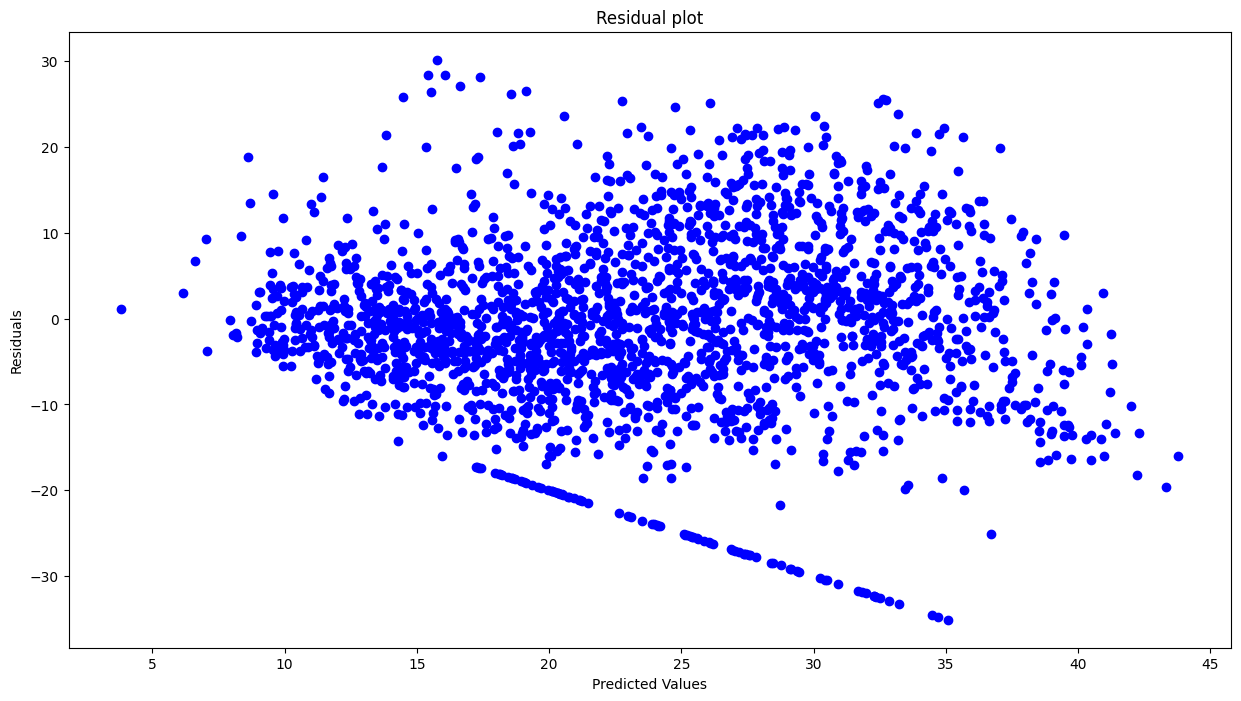

In [ ]:
# Hetroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso), color='blue')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual plot')

#<b/>RIDGE REGRESSION</B>

In [ ]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [ ]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
#check the score
ridge.score(X_train, y_train)

0.7722100789802107

In [ ]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 35.07752456136463
RMSE : 5.922628180239296
MAE : 4.474125776125379
R2 : 0.7722100789802107
Adjusted R2 : 0.7672118874358922


<b/>Here our r2 score value is 0.77, that display our model is able to captured most of the data variance. So here we should store in dataframe for later comparison.</b>

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 33.27678426818438
RMSE : 5.768603320404722
MAE : 4.410414932539515
R2 : 0.7893426477812578
Adjusted R2 : 0.7847203809491939


<b/>In the test set's r2_score is 0.78, that means our linear model is  performing good on the data. So here we now visualize our residuals to see there have hetroscedasticity(unequal variance and scatter).</b>



In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

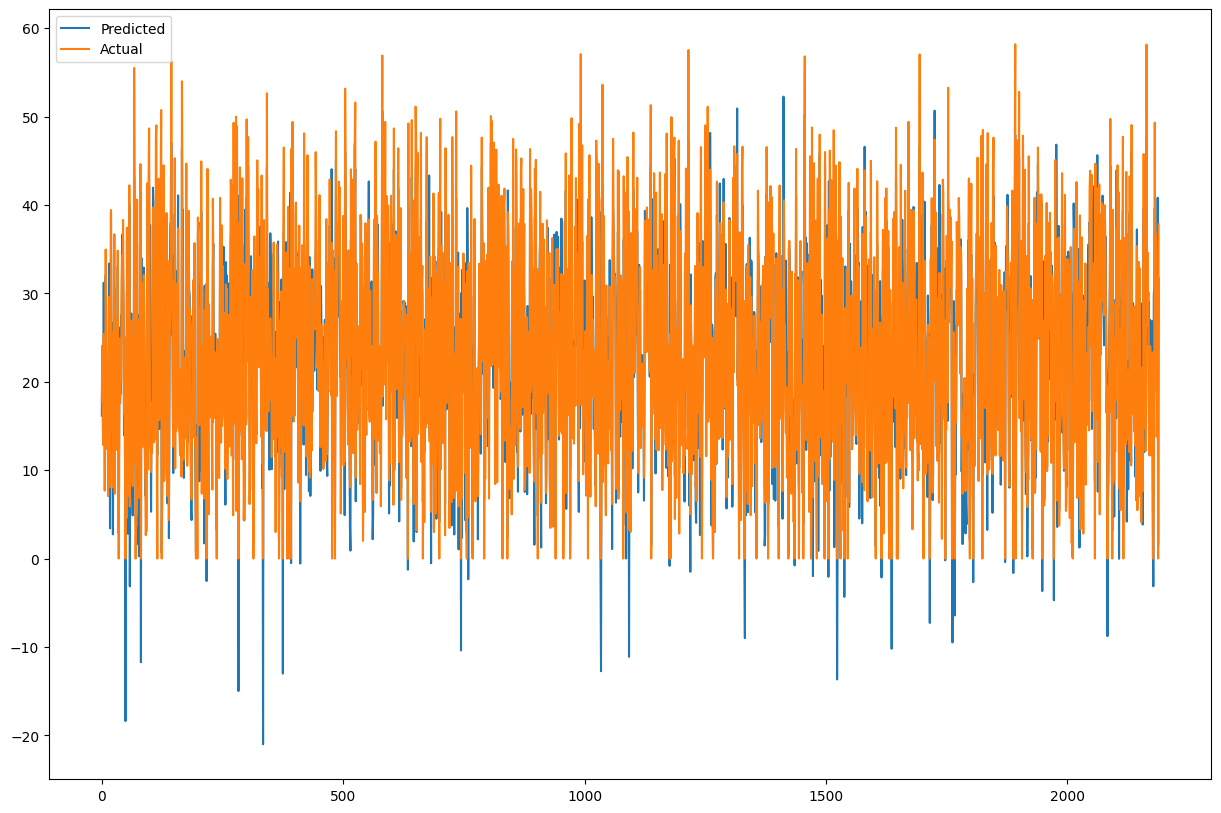

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 1.0, 'Residual plot')

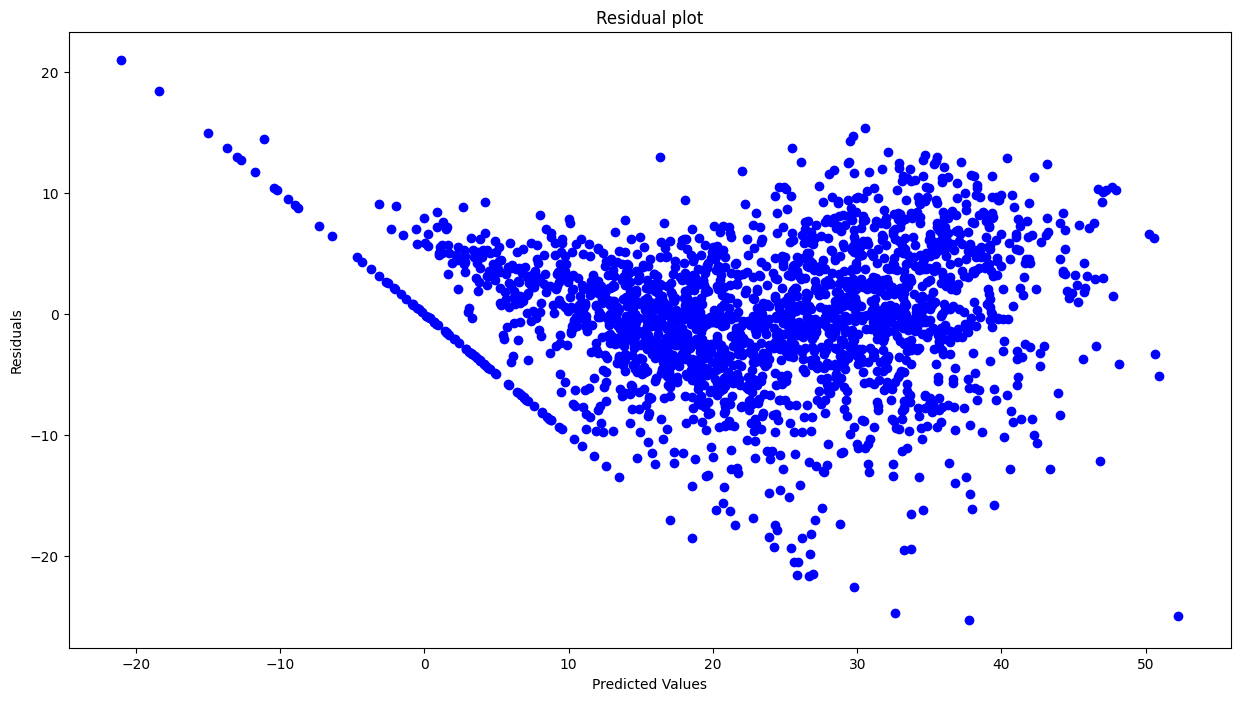

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge), color='blue')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual plot')

#<B/>ELASTIC NET REGRESSION</B>

In [ ]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
#check the score
elasticnet.score(X_train, y_train)

0.6261189054494012

In [ ]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 57.5742035398887
RMSE : 7.587766703048315
MAE : 5.792276538970546
R2 : 0.6261189054494012
Adjusted R2 : 0.6179151652795234


<b/>Here our r2 score value is 0.62, that display our model is able to captured most of the data variance. So here we should store in dataframe for later comparison.</b>

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 59.45120536350042
RMSE : 7.710460775044538
MAE : 5.873612334800099
R2 : 0.6236465216363589
Adjusted R2 : 0.6153885321484546


<b/>In the test set's r2_score is 0.62, that means our linear model is performing good on the data. So here we now visualize our residuals to see there have hetroscedasticity(unequal variance and scatter).</b>

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

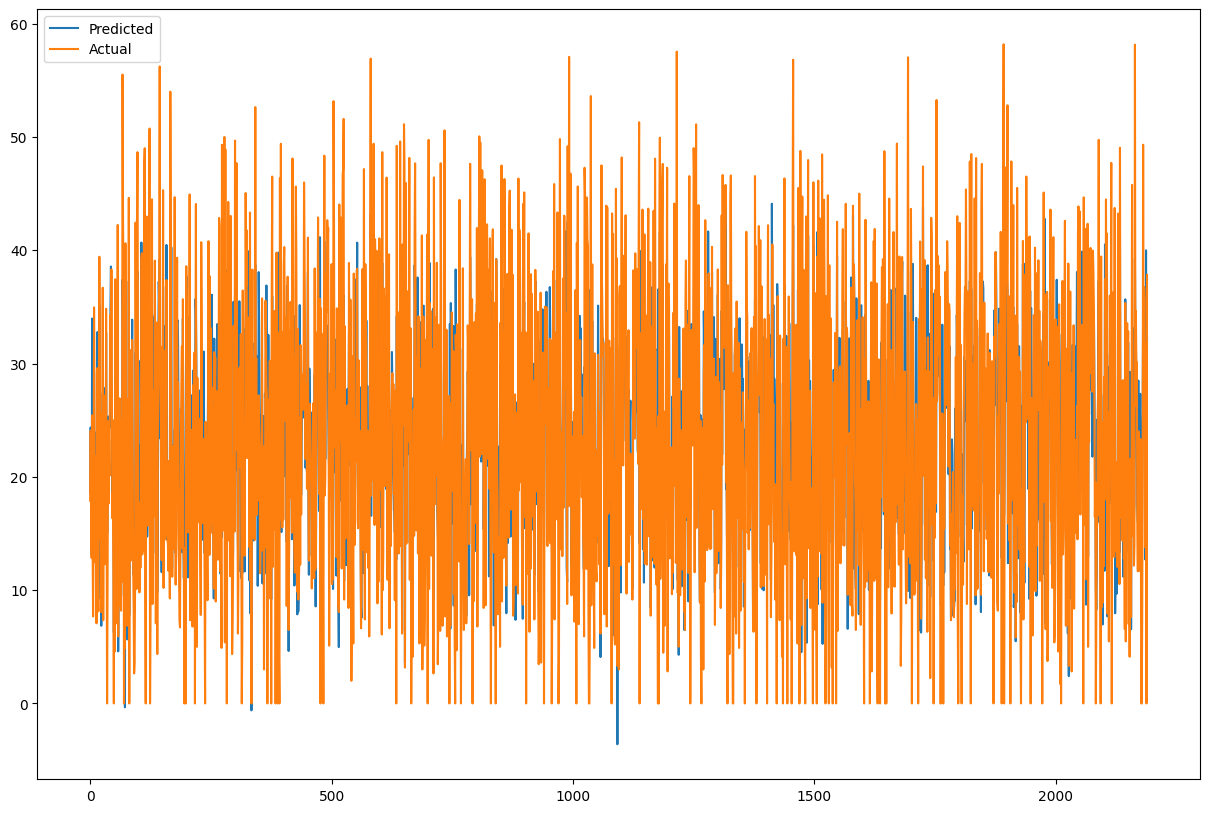

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

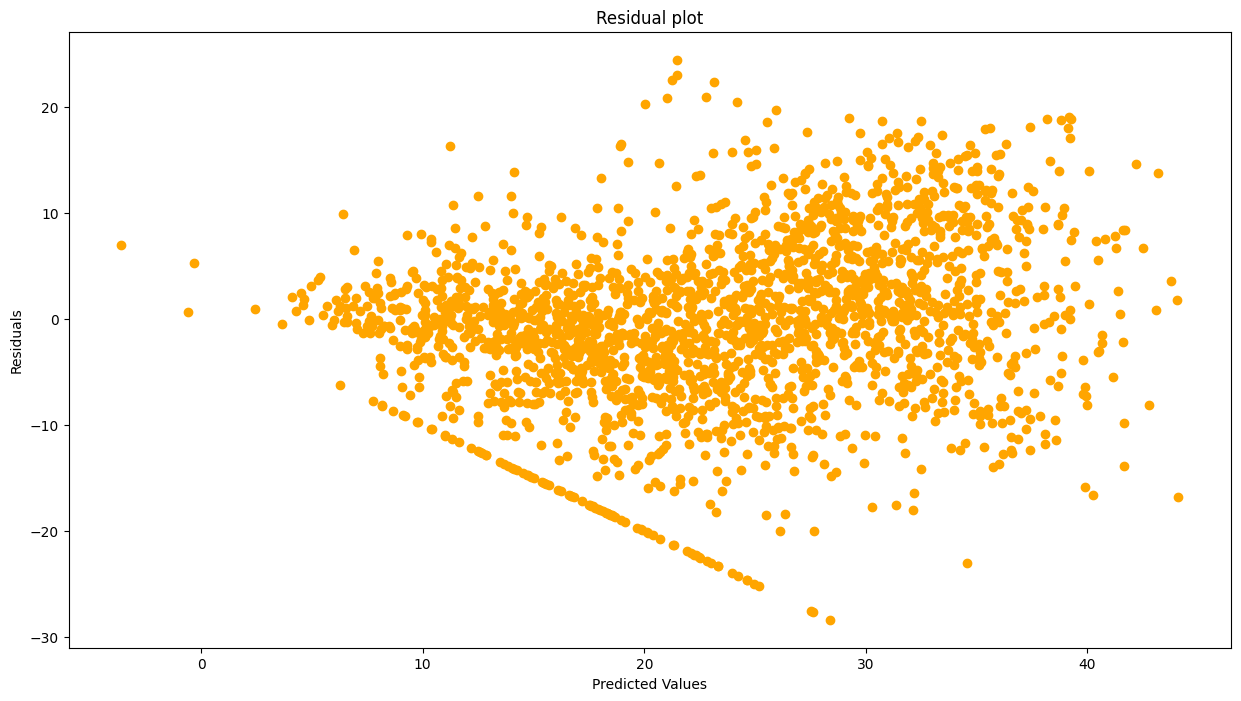

In [ ]:
#Hetroscadicty
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en), color='orange')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

#<b/>RANDOM FOREST</b>

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Making predictions on train and test data
y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9897077348482433
MSE : 1.584912897096356
RMSE : 1.2589332377439066
MAE : 0.7997066839232552
R2 : 0.9897077348482433
Adjusted R2 : 0.9894819008323084


<b/>Here our r2 score value is 0.98, that display our model is able to captured most of the data variance. So here we should store in dataframe for later comparison.</b>

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 12.423049780587705
RMSE : 3.524634701722677
MAE : 2.1893384573991255
R2 : 0.9213563801066461
Adjusted R2 : 0.9196307731341963


<b/>In the test set's r2_score is 0.91, that means our linear model is performing good on the data. So here we now visualize our residuals to see there have hetroscedasticity(unequal variance and scatter).</b>

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

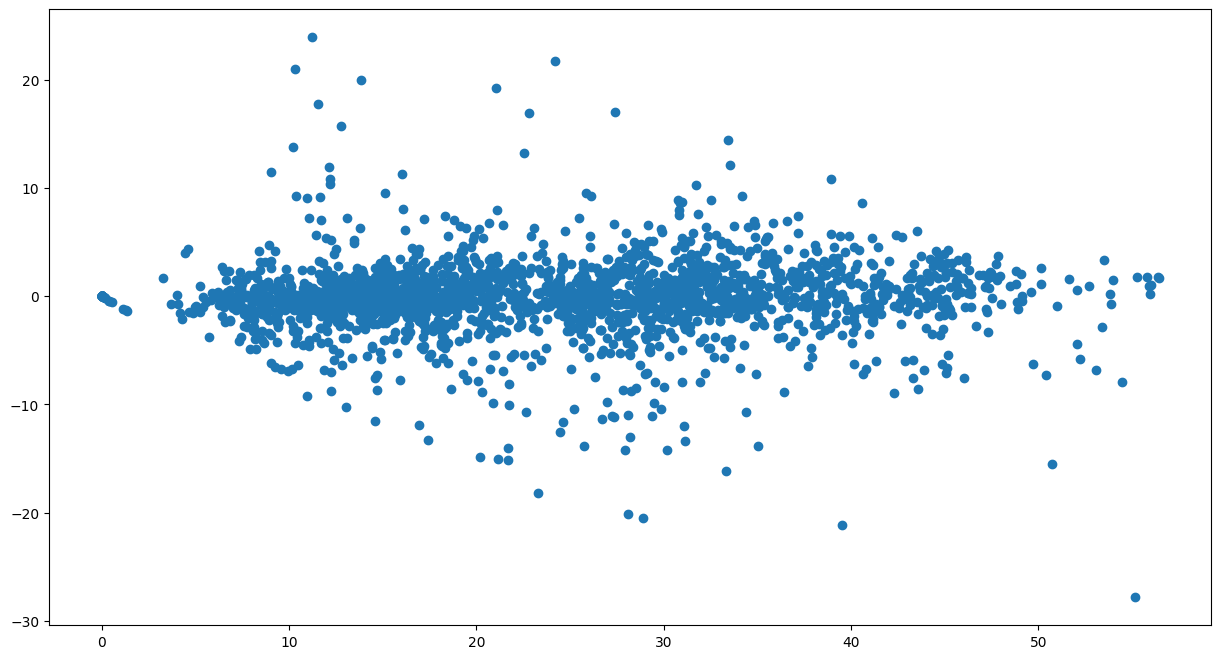

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))

In [ ]:
rf_model.feature_importances_

array([3.15022711e-01, 1.54087138e-01, 1.23288429e-02, 1.22575239e-02,
       3.37627223e-02, 3.41158617e-02, 1.56224815e-03, 4.63700480e-03,
       1.25768070e-02, 1.95438890e-02, 2.76382379e-02, 2.42759745e-02,
       8.25935186e-03, 4.12230411e-03, 1.36518543e-02, 1.00845039e-03,
       2.27586915e-03, 1.17173096e-03, 3.00660526e-04, 2.66692393e-04,
       4.03138872e-04, 1.44322640e-03, 3.72391406e-03, 1.06041228e-02,
       3.08635198e-02, 1.81843853e-02, 1.29600875e-02, 1.38837373e-02,
       1.09922798e-02, 4.22483775e-03, 3.85548559e-03, 8.67256035e-04,
       8.86575097e-03, 4.02720089e-03, 1.50574169e-01, 2.91996073e-04,
       3.95405336e-03, 1.19387482e-03, 1.58564780e-03, 2.31904911e-03,
       6.24837376e-04, 2.14774243e-03, 8.37224151e-04, 2.95349529e-03,
       5.44150379e-03, 7.64187233e-04, 1.95474013e-02])

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

Feature  Feature Importance
0          Temperature(°C)                0.32
1              Humidity(%)                0.15
2         Wind speed (m/s)                0.01
3         Visibility (10m)                0.01
4  Solar Radiation (MJ/m2)                0.03

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
0           Temperature(°C)                0.32
34      Functioning Day_Yes                0.15
1               Humidity(%)                0.15
10                   Hour_4                0.03
4   Solar Radiation (MJ/m2)                0.03
5              Rainfall(mm)                0.03
24                  Hour_18                0.03
25                  Hour_19                0.02
11                   Hour_5                0.02
46       weekdays_weekend_1                0.02
9                    Hour_3                0.02
3          Visibility (10m)                0.01
44                 month_11                0.01
2          Wind speed (m/s)                0.01
32           Seasons_Winter                0.01
8                    Hour_2                0.01
27                  Hour_21                0.01
26                  Hour_20                0.01
28                  Hour_22                0.01
23                  Hour_17                0.01
12                   Hour_6                0.01
14                   Hour_8                0.01
13                   Hour_7                0.00
45                 month_12                0.00
43                 month_10                0.00
42                  month_9                0.00
41                  month_8                0.00
40                  month_7                0.00
39                  month_6                0.00
38                  month_5                0.00
37                  month_4                0.00
36                  month_3                0.00
35                  month_2                0.00
19                  Hour_13                0.00
20                  Hour_14                0.00
31           Seasons_Summer                0.00
30           Seasons_Spring                0.00
29                  Hour_23                0.00
15                   Hour_9                0.00
16                  Hour_10                0.00
17                  Hour_11                0.00
18                  Hour_12                0.00
6             Snowfall (cm)                0.00
7                    Hour_1                0.00
22                  Hour_16                0.00
21                  Hour_15                0.00
33       Holiday_No Holiday                0.00

In [ ]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

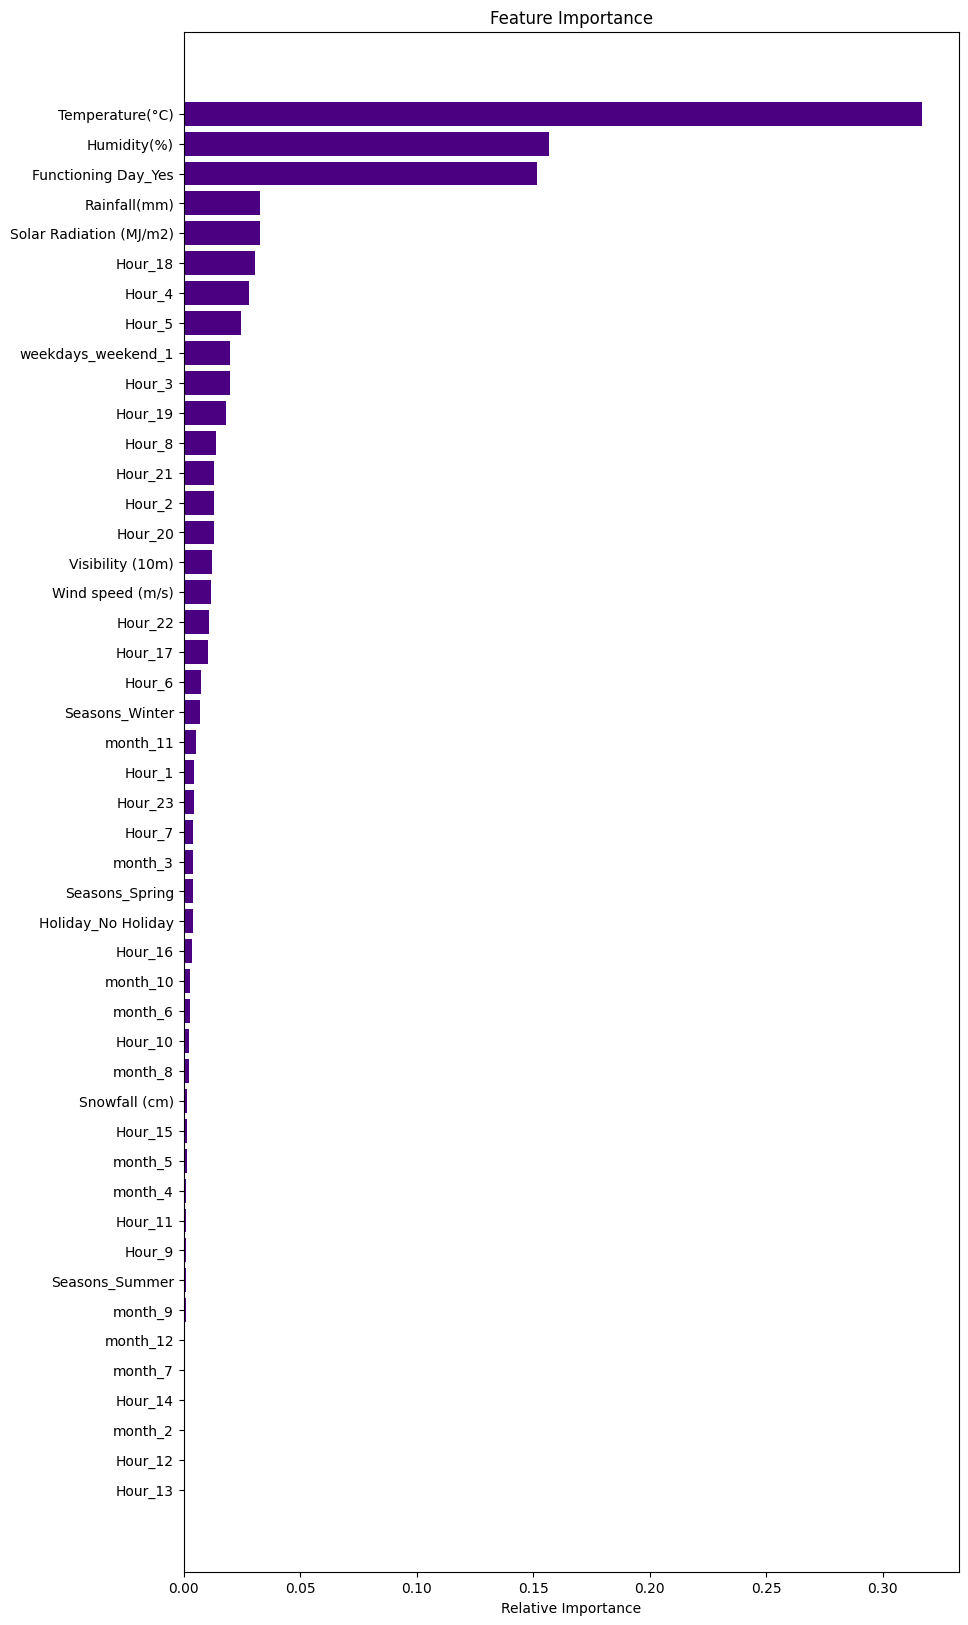

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='indigo', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#<b/>Gradient Boosting</b>

In [ ]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8789016499095264
MSE : 18.64801713184794
RMSE : 4.3183349953249275
MAE : 3.269003569273124
R2 : 0.8789016499095264
Adjusted R2 : 0.8762444965695393


<b/>Here our r2 score value is 0.87, that display our model is able to captured most of the data variance. So here we should store in dataframe for later comparison.</b>

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 21.28944184250869
RMSE : 4.6140483138463875
MAE : 3.492858786559991
R2 : 0.8652280396863458
Adjusted R2 : 0.8622708584843188


<b/>In the test set's r2_score is 0.86, that means our linear model is performing good on the data. So here we now visualize our residuals to see there have hetroscedasticity(unequal variance and scatter).</b>

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

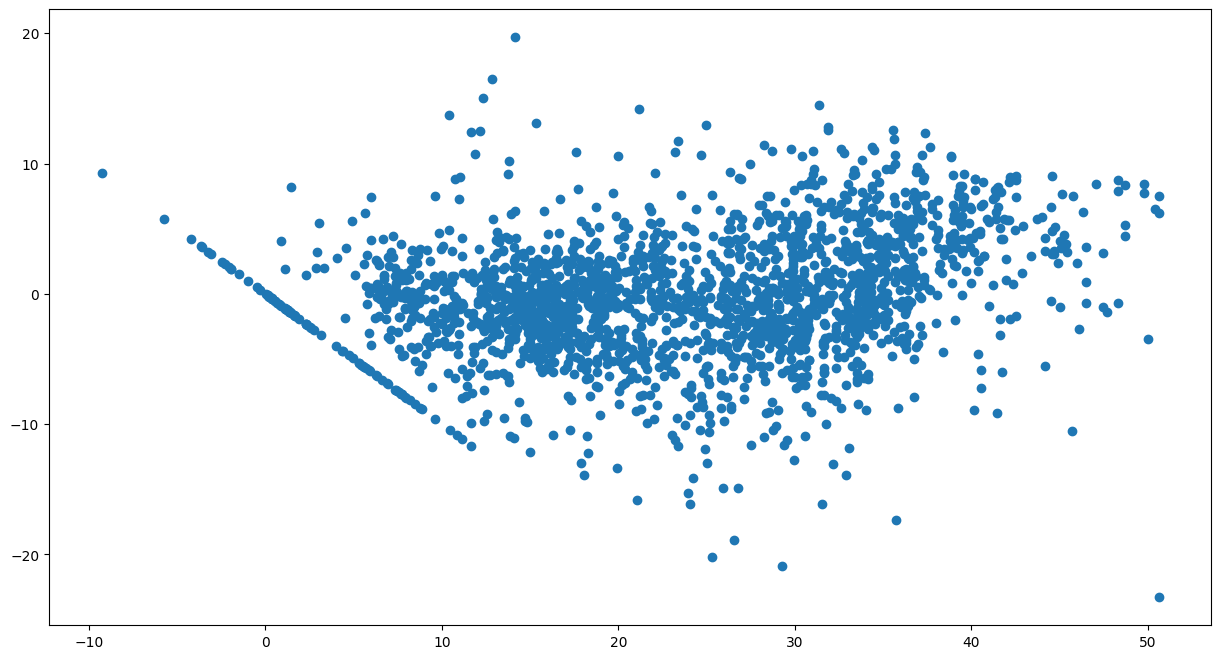

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g))

In [ ]:
gb_model.feature_importances_

array([3.21437110e-01, 1.28054219e-01, 5.01908892e-04, 4.45596896e-04,
       4.82210501e-02, 6.50977064e-02, 3.00825496e-05, 4.41679040e-04,
       6.20291012e-03, 1.54723207e-02, 2.77923448e-02, 2.09197623e-02,
       5.54914116e-03, 1.38849071e-03, 9.51964101e-03, 0.00000000e+00,
       2.87933226e-03, 1.37560679e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.08156531e-04, 7.57741782e-03,
       3.03117662e-02, 1.74699066e-02, 1.14240782e-02, 1.55664225e-02,
       1.20487441e-02, 2.45479420e-04, 1.42322866e-05, 0.00000000e+00,
       3.35174157e-02, 2.23294271e-03, 1.74747832e-01, 0.00000000e+00,
       1.72209214e-03, 9.33502112e-05, 2.82254756e-04, 4.18000398e-03,
       0.00000000e+00, 2.66904099e-03, 0.00000000e+00, 6.76468137e-03,
       5.12015005e-03, 2.89720073e-04, 1.79854096e-02])

In [ ]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

importance_df.head()

Feature  Feature Importance
0          Temperature(°C)                0.32
1              Humidity(%)                0.13
2         Wind speed (m/s)                0.00
3         Visibility (10m)                0.00
4  Solar Radiation (MJ/m2)                0.05

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
0           Temperature(°C)                0.32
34      Functioning Day_Yes                0.17
1               Humidity(%)                0.13
5              Rainfall(mm)                0.07
4   Solar Radiation (MJ/m2)                0.05
32           Seasons_Winter                0.03
24                  Hour_18                0.03
10                   Hour_4                0.03
11                   Hour_5                0.02
27                  Hour_21                0.02
25                  Hour_19                0.02
46       weekdays_weekend_1                0.02
9                    Hour_3                0.02
12                   Hour_6                0.01
44                 month_11                0.01
43                 month_10                0.01
28                  Hour_22                0.01
26                  Hour_20                0.01
8                    Hour_2                0.01
23                  Hour_17                0.01
14                   Hour_8                0.01
20                  Hour_14                0.00
2          Wind speed (m/s)                0.00
45                 month_12                0.00
15                   Hour_9                0.00
42                  month_9                0.00
41                  month_8                0.00
40                  month_7                0.00
39                  month_6                0.00
38                  month_5                0.00
37                  month_4                0.00
36                  month_3                0.00
35                  month_2                0.00
33       Holiday_No Holiday                0.00
21                  Hour_15                0.00
3          Visibility (10m)                0.00
31           Seasons_Summer                0.00
30           Seasons_Spring                0.00
13                   Hour_7                0.00
16                  Hour_10                0.00
6             Snowfall (cm)                0.00
17                  Hour_11                0.00
7                    Hour_1                0.00
18                  Hour_12                0.00
19                  Hour_13                0.00
22                  Hour_16                0.00
29                  Hour_23                0.00

In [ ]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

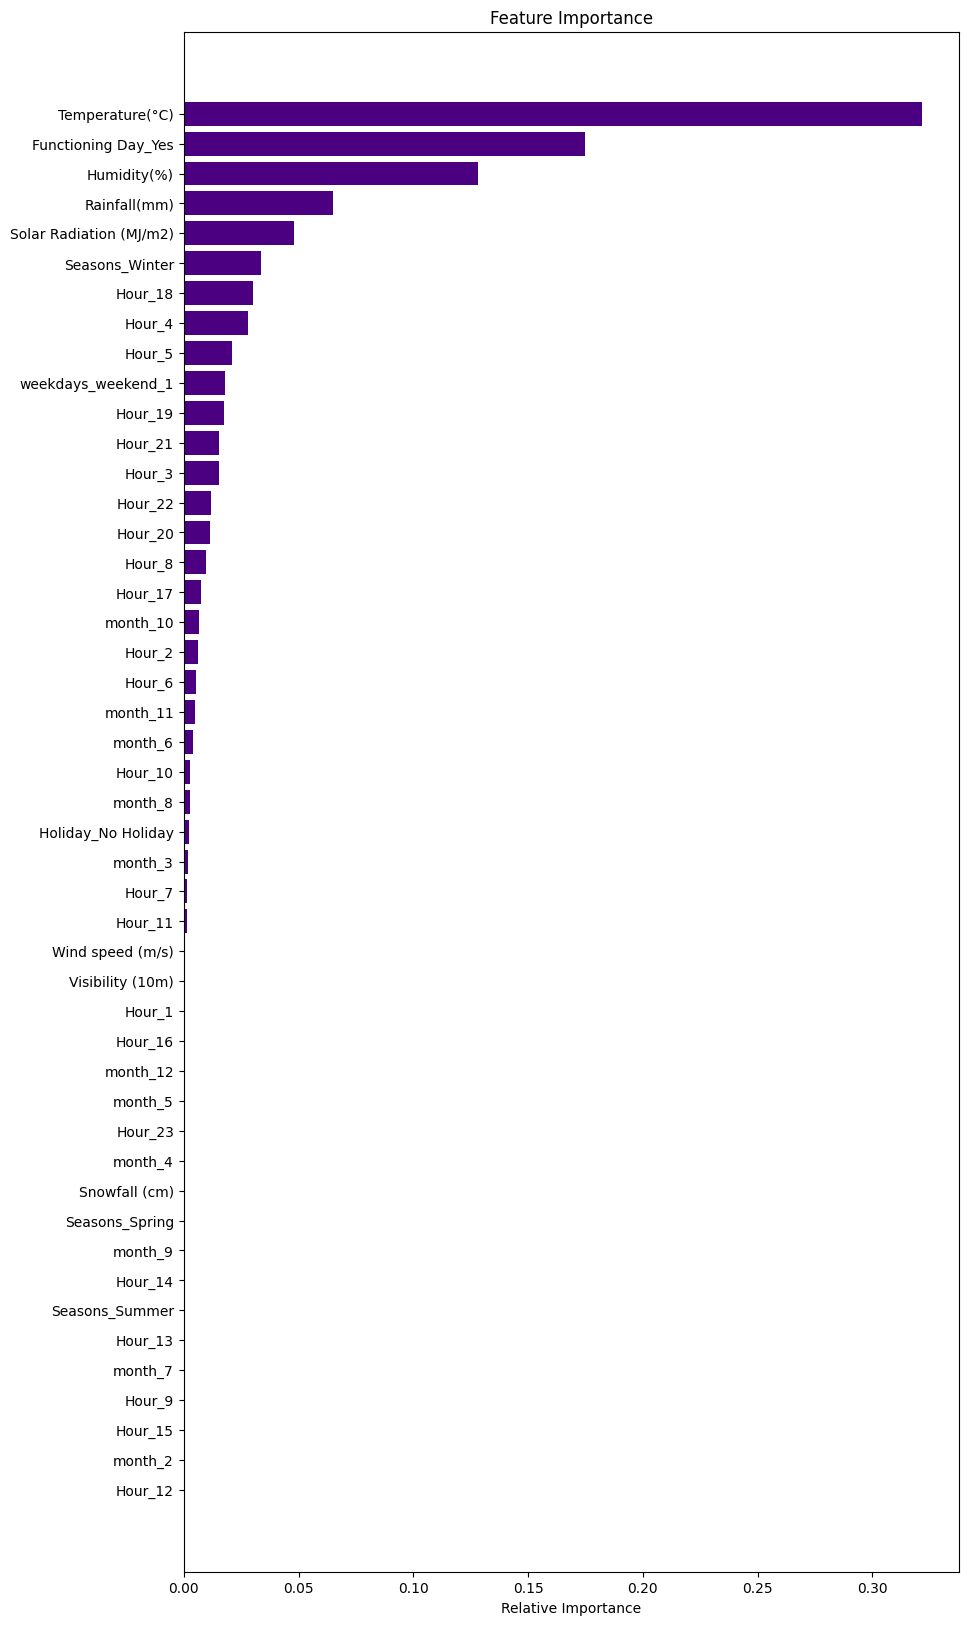

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='indigo', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#<b/>Hyperparameter Tuning</b>

Hyperparameters tuning is the process of determining the right combination of hyperparameters that maximizes the model performance.


**Using GridSearchCV**

The process of performing hyperparameter tuning in order to determine the optimal values for a given model. Grid Search looks at every possible combination of hyperparameters to find the best model, random search only selects and tests a random combination of hyperparameters.


##<b/>Gradient Boosting Regressor with GridSearchCV</b>

###<b/>Provide the range of values for chosen hyperparameters</b>

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

###<b/>Importing Gradient Boosting Regressor</b>

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [ ]:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9515896672300013
MSE : 7.454740004128373
RMSE : 2.7303369762958516
MAE : 1.8489194833919358
R2 : 0.9515896672300013
Adjusted R2 : 0.9505274423746372


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 12.392760556291103
RMSE : 3.520335290322657
MAE : 2.4005915565405354
R2 : 0.921548124829924
Adjusted R2 : 0.9198267251413182


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

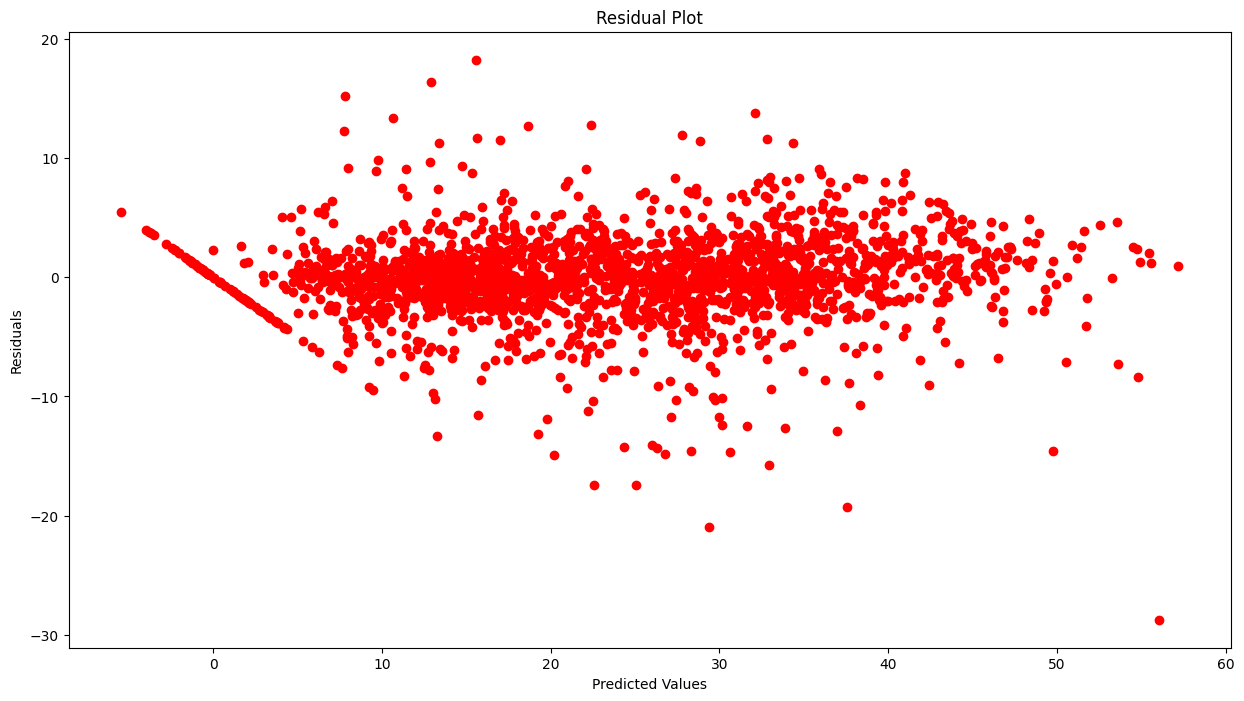

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_g_g),(y_test)-(y_pred_g_g), color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.show()

In [ ]:
gb_optimal_model.feature_importances_

array([3.12057438e-01, 1.52960270e-01, 6.20316780e-03, 6.03743312e-03,
       3.75324776e-02, 4.41384879e-02, 1.25380735e-03, 9.51937002e-04,
       9.98653930e-03, 1.96911560e-02, 2.89529919e-02, 2.45449359e-02,
       6.18872117e-03, 3.32550727e-03, 1.20634772e-02, 4.66509851e-04,
       3.73626049e-03, 2.06003352e-03, 6.36119042e-05, 1.39325973e-04,
       9.77140091e-05, 5.27337742e-04, 1.33847427e-03, 9.51593158e-03,
       3.11372494e-02, 1.65223193e-02, 1.21776066e-02, 1.44682226e-02,
       9.91879886e-03, 2.41023598e-03, 3.67911329e-03, 1.06796008e-03,
       1.62472784e-02, 2.18064007e-03, 1.57198472e-01, 7.75938658e-05,
       1.32320249e-03, 1.09973153e-04, 1.66051097e-03, 2.73793528e-03,
       1.57350693e-03, 6.25331294e-03, 7.62045639e-05, 6.35447256e-03,
       4.56464936e-03, 1.05534757e-03, 2.33718468e-02])

In [ ]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

importance_df.head()

Feature  Feature Importance
0          Temperature(°C)                0.31
1              Humidity(%)                0.15
2         Wind speed (m/s)                0.01
3         Visibility (10m)                0.01
4  Solar Radiation (MJ/m2)                0.04

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
0           Temperature(°C)                0.31
34      Functioning Day_Yes                0.16
1               Humidity(%)                0.15
4   Solar Radiation (MJ/m2)                0.04
5              Rainfall(mm)                0.04
10                   Hour_4                0.03
24                  Hour_18                0.03
32           Seasons_Winter                0.02
25                  Hour_19                0.02
11                   Hour_5                0.02
46       weekdays_weekend_1                0.02
9                    Hour_3                0.02
8                    Hour_2                0.01
43                 month_10                0.01
41                  month_8                0.01
2          Wind speed (m/s)                0.01
3          Visibility (10m)                0.01
12                   Hour_6                0.01
28                  Hour_22                0.01
27                  Hour_21                0.01
26                  Hour_20                0.01
23                  Hour_17                0.01
14                   Hour_8                0.01
22                  Hour_16                0.00
35                  month_2                0.00
45                 month_12                0.00
44                 month_11                0.00
13                   Hour_7                0.00
42                  month_9                0.00
40                  month_7                0.00
39                  month_6                0.00
38                  month_5                0.00
37                  month_4                0.00
36                  month_3                0.00
15                   Hour_9                0.00
21                  Hour_15                0.00
33       Holiday_No Holiday                0.00
16                  Hour_10                0.00
31           Seasons_Summer                0.00
30           Seasons_Spring                0.00
17                  Hour_11                0.00
18                  Hour_12                0.00
19                  Hour_13                0.00
20                  Hour_14                0.00
6             Snowfall (cm)                0.00
7                    Hour_1                0.00
29                  Hour_23                0.00

In [ ]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

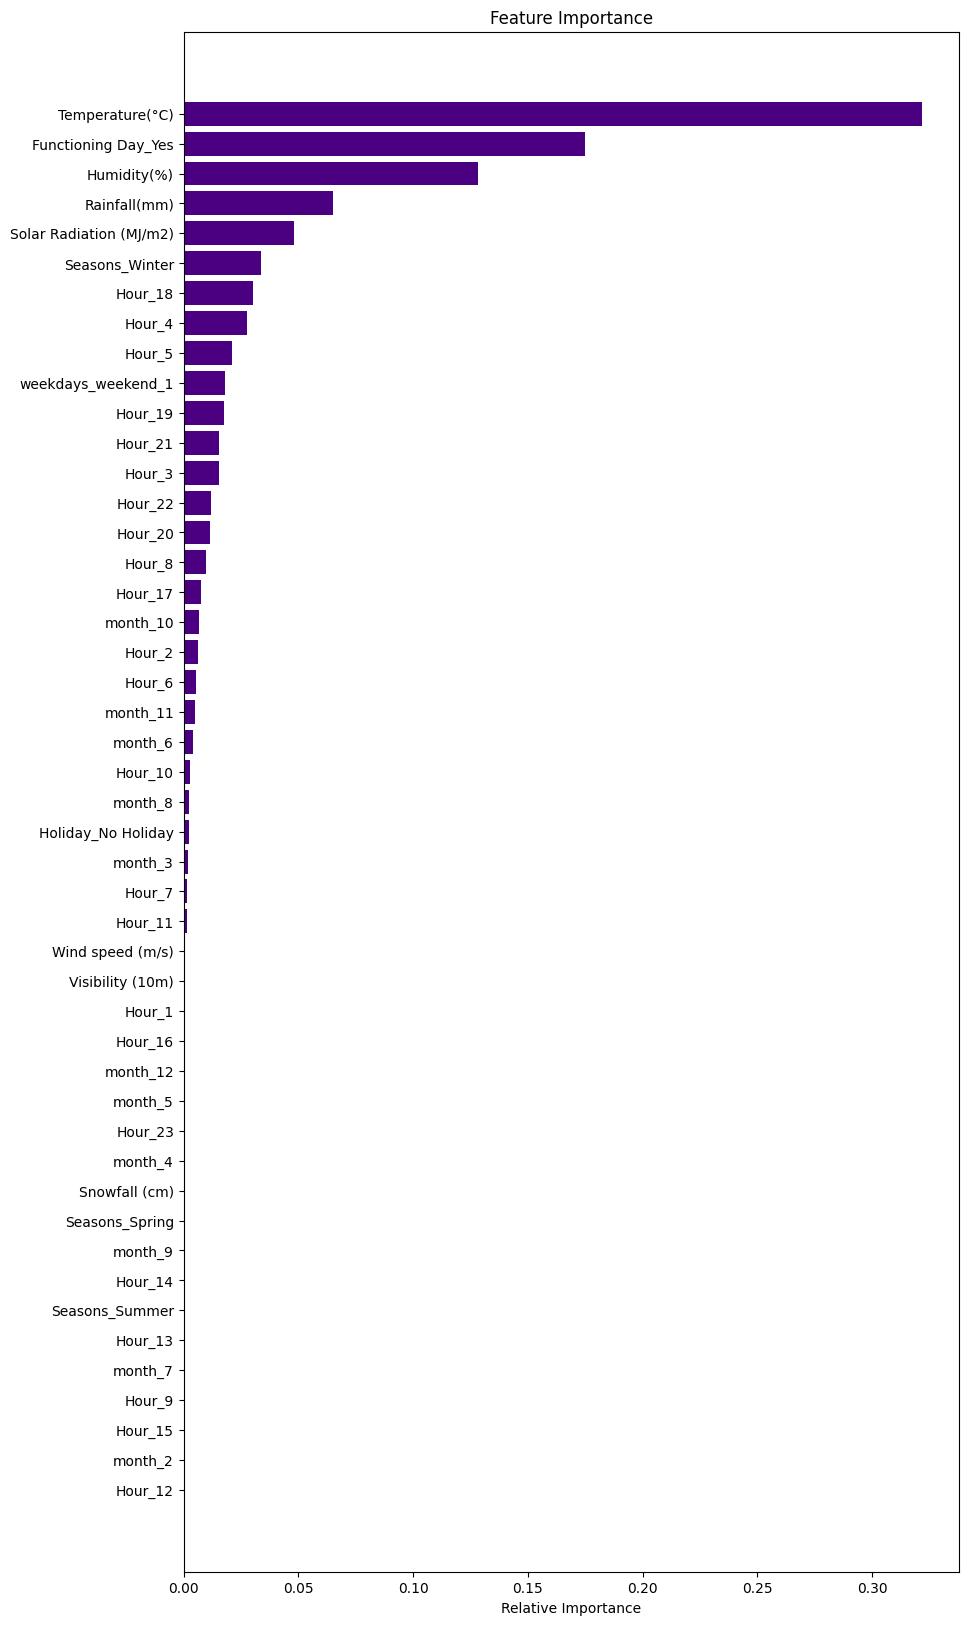

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='indigo', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#<b/>CONCLUSION</b>

 In the time of analysis, we perform initial Exploratory Data Analysis(EDA) on all the features of our dataset. Firstly we analzye that our dependent variable 'Rented Bike Count' and applied transformations as compulsory. After that we inspect the categorical variables and removed the variable which had majority of one class, and we also analyzed numerical variable, and calculated thier coorelation, distribution, and their relationship with dependent varaible. Further more we removed some numerical features that contained mostly 0 values and implemented one-hot encoding to the categorical variables.


 Afterword we implemented 6 machine learning algorithms including Linear Regression, Lasso, Ridge, Elastic Net, Random Forest, and XG Boost. And we perform hyperparameter tuning to boost our model performance, and result of our model performance are :-  




In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result


Model    MAE     MSE   RMSE  \
Training set 0               Linear regression   4.474  35.078  5.923   
             1                Lasso regression   7.255  91.594  9.570   
             2                Ridge regression   4.474  35.078  5.923   
             3          Elastic net regression   5.792  57.574  7.588   
             4        Random forest regression   0.800   1.585  1.259   
             5    Gradient boosting regression   3.269  18.648  4.318   
             6  Gradient Boosting gridsearchcv   1.849   7.455  2.730   
Test set     0               Linear regression   4.410  33.275  5.768   
             1                Lasso regression   7.456  96.775  9.837   
             2                Ridge regression   4.410  33.277  5.769   
             3      Elastic net regression Test  5.874  59.451  7.710   
             4        Random forest regression   2.189  12.423  3.525   
             5    Gradient boosting regression   3.493  21.289  4.614   
             6  Gradient Boosting gridsearchcv   2.401  12.393  3.520   

                R2_score  Adjusted R2  
Training set 0     0.772         0.77  
             1     0.405         0.39  
             2     0.772         0.77  
             3     0.626         0.62  
             4     0.990         0.99  
             5     0.879         0.88  
             6     0.952         0.95  
Test set     0     0.789         0.78  
             1     0.387         0.37  
             2     0.789         0.78  
             3     0.624         0.62  
             4     0.921         0.92  
             5     0.865         0.86  
             6     0.922         0.92

* Amid all the models on the training set, The Gradient Boosting Gridsearchcv has the lowest MAE, MSE, and RMSE, and the highest R2_score and Adjusted R2.

* The Linear Regression and Ridge Regression models have same MAE, MSE, RMSE, R2_score, and Adjusted R2 on the training set and test set.

* Amid all the model on the test set, the Gradient Boosting GridSearchcv has the lowest MAE, MSE, and RMSE and the R2_score and Adjusted R2 are highest.

* The Lasso Regression has the highest MAE, MSE, and RMSE on both training set and test set.

* Elastic Net regression has similar performance on both training set and test set.

* Most important feature are temperature.

* There is no overfitting in dataset.

* Elastic net Regressor perfom good but not as well as the Gradient Boosting GridSearchcv and Linear Regression models.

* Gradient Boosting regression model had good performance on the training set, but slightly inferior perfromance on the test sets.

* Random forest Regressor and gridsearchcv gives the highest R2 score 99% and 95% in training set and in test set is 92%.


So, here we analyze that the GridSearchcv model is the most promising model for this dataset based on the presented metrics.

We can deploy this model.


Here, The current analysis may be insightful, it is important to note that the dataset is time-dependent and variables such as temperature, windspeed, and solar radiation may not always remain consistent. So at the end there may be situation where the model fails to perform well. So in the field of machine learning is constantly evolving, it is necessary to stay up-to-date with the latest developments and prepared to ready to handle  unexpected senarios, Or mantaining and understanding of machine learning concepts will undoubtedly provide an advantage in staying ahead in the future.


